<a href="https://colab.research.google.com/github/sanskritisaxenaaa/sanskriti/blob/main/wallmart_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files

# Upload the ZIP file
uploaded = files.upload()

Saving Walmart DataSet.csv to Walmart DataSet.csv


In [3]:
import pandas as pd

df = pd.read_csv('Walmart DataSet.csv')

In [8]:
# Check for missing values
print(df.isnull().sum())


Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [5]:
# Summary statistics for numerical columns
print(df.describe())

# Check data types and non-null counts
print(df.info())

             Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.232807     14.313000  


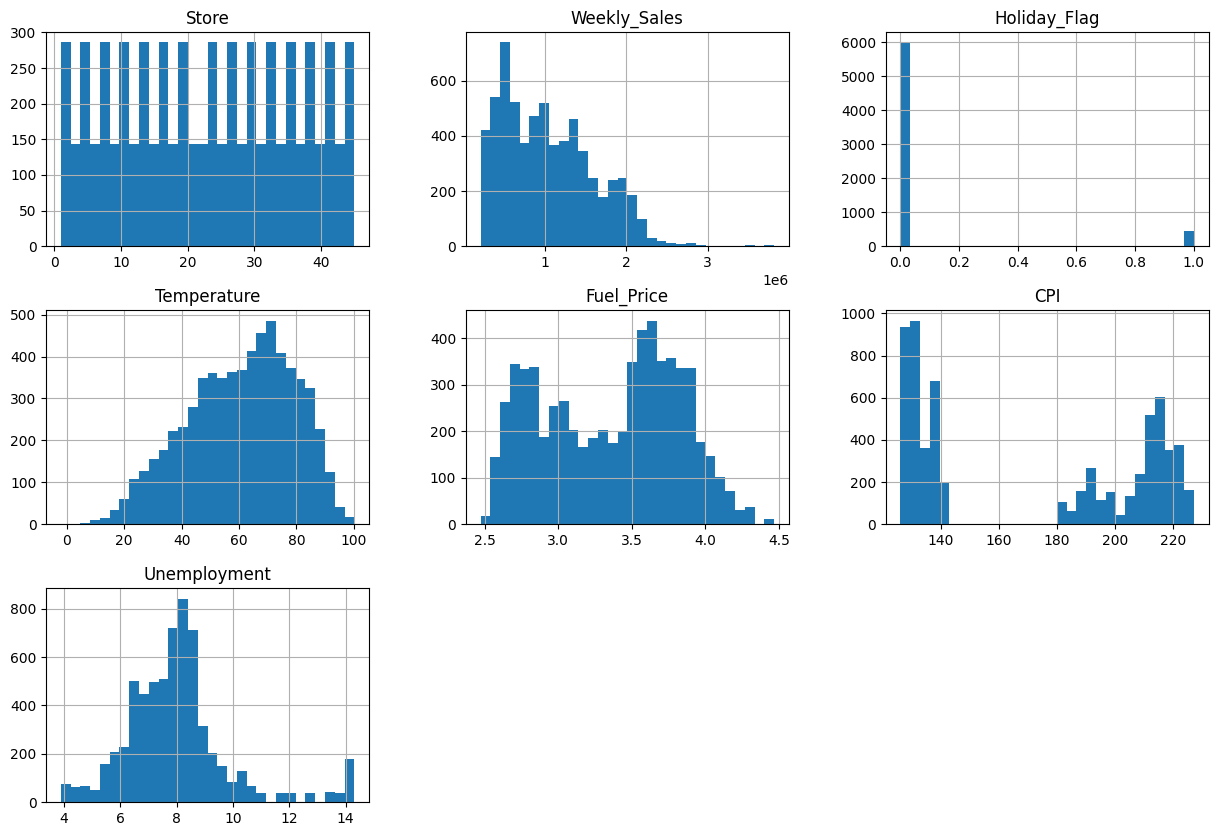

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numerical columns
df.hist(bins=30, figsize=(15, 10))
plt.show()

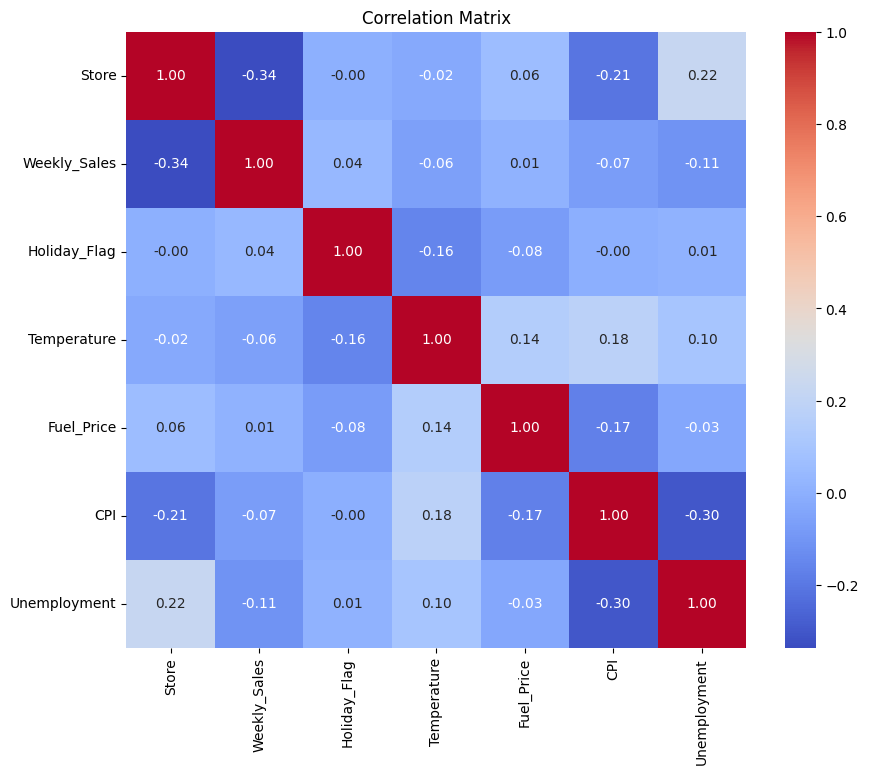

In [9]:
# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Select only numeric columns for correlation matrix
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_df = df[numeric_columns]

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Holiday_Flag
0    5985
1     450
Name: count, dtype: int64


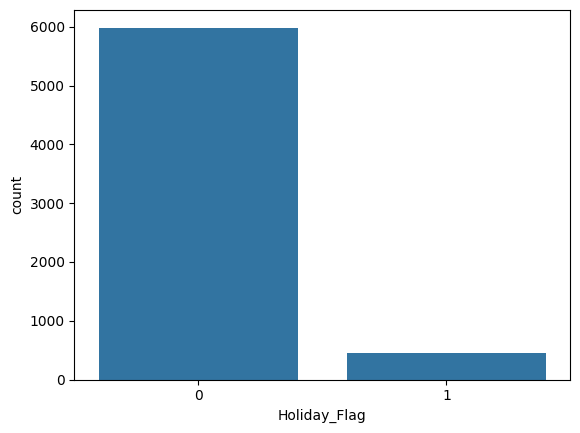

In [10]:
# Count of unique values in categorical columns
print(df['Holiday_Flag'].value_counts())

# Visualize the distribution of 'Holiday_Flag'
sns.countplot(x='Holiday_Flag', data=df)
plt.show()

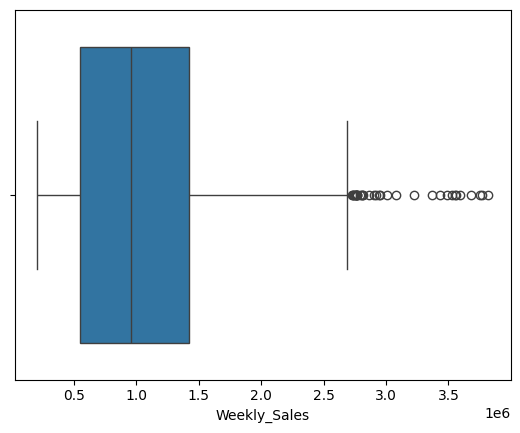

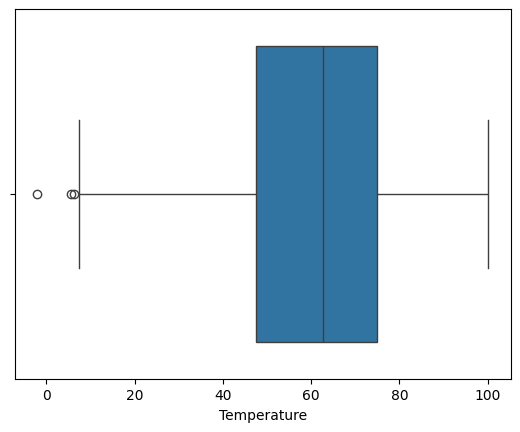

In [11]:
# Boxplot for 'Weekly_Sales'
sns.boxplot(x=df['Weekly_Sales'])
plt.show()

# Boxplot for 'Temperature'
sns.boxplot(x=df['Temperature'])
plt.show()

In [13]:
# Detect outliers using IQR method
Q1 = df["Weekly_Sales"].quantile(0.25)
Q3 = df["Weekly_Sales"].quantile(0.75)
IQR = Q3 - Q1

# Define outlier threshold
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers = df[(df["Weekly_Sales"] < lower_bound) | (df["Weekly_Sales"] > upper_bound)]

# Percentage of outliers in the dataset
outlier_percentage = (len(outliers) / len(df)) * 100

len(outliers), outlier_percentage


(3, 0.046845721424109935)

<ipython-input-14-320a049b186b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Date'].dt.month
<ipython-input-14-320a049b186b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Date'].dt.year


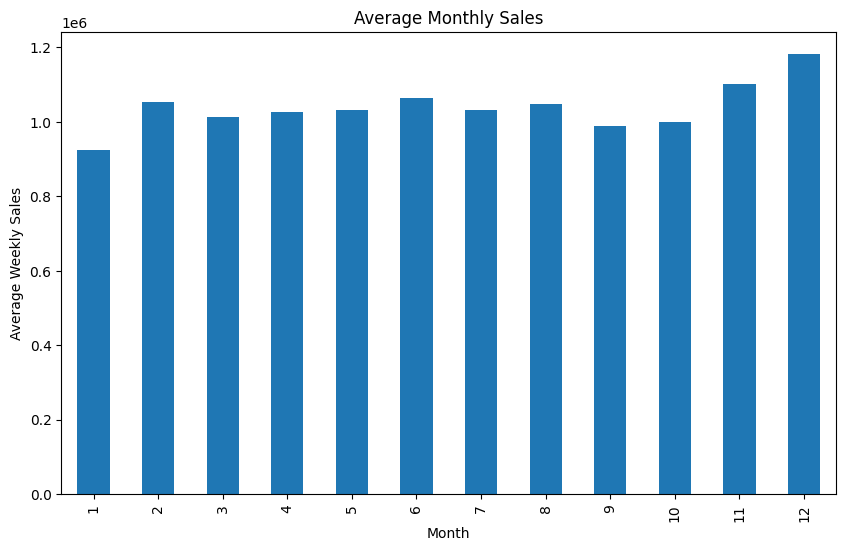

In [14]:
# Extract month and year from 'Date'
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Analyze sales by month
monthly_sales = df.groupby('Month')['Weekly_Sales'].mean()
monthly_sales.plot(kind='bar', figsize=(10, 6))
plt.title('Average Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales')
plt.show()

In [15]:
df.to_csv("Cleaned_Walmart_DataSet.csv", index=False)

In [17]:
#Q1
# Correlation between Weekly_Sales and Unemployment
correlation = df['Weekly_Sales'].corr(df['Unemployment'])
print(f"Correlation between Weekly_Sales and Unemployment: {correlation}")

Correlation between Weekly_Sales and Unemployment: -0.105024531492606


In [18]:
# Group by Store and calculate average Weekly_Sales and Unemployment
store_analysis = df.groupby('Store').agg({
    'Weekly_Sales': 'mean',
    'Unemployment': 'mean'
}).reset_index()


store_correlations = []
for store in store_analysis['Store'].unique():
    store_data = df[df['Store'] == store]
    correlation = store_data['Weekly_Sales'].corr(store_data['Unemployment'])
    store_correlations.append({'Store': store, 'Correlation': correlation})


store_correlations_df = pd.DataFrame(store_correlations)


store_correlations_df = store_correlations_df.sort_values(by='Correlation')


print("Stores most negatively affected by unemployment:")
print(store_correlations_df.head())

Stores most negatively affected by unemployment:
    Store  Correlation
37     38    -0.785290
43     44    -0.780076
3       4    -0.639563
12     13    -0.400254
38     39    -0.384681


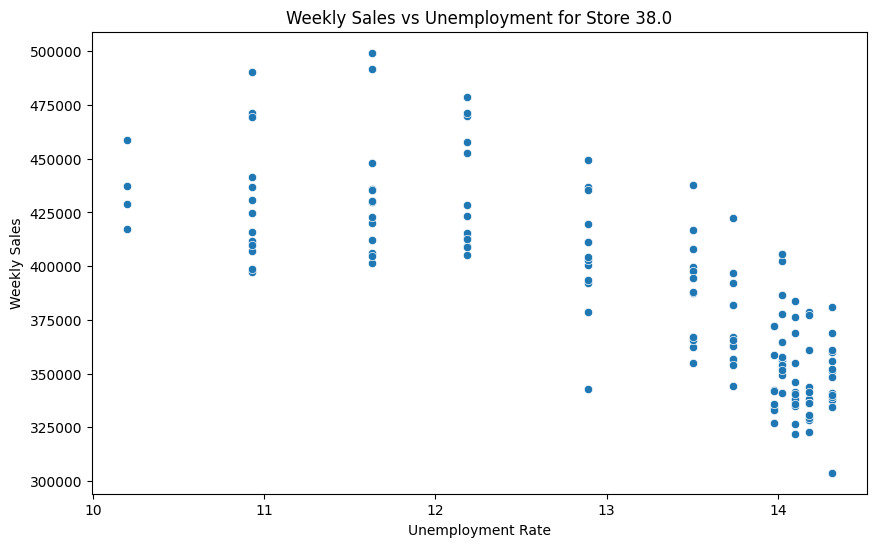

In [19]:
##Weekly_Sales vs Unemployment for the most affected store
most_affected_store = store_correlations_df.iloc[0]['Store']
store_data = df[df['Store'] == most_affected_store]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=store_data)
plt.title(f'Weekly Sales vs Unemployment for Store {most_affected_store}')
plt.xlabel('Unemployment Rate')
plt.ylabel('Weekly Sales')
plt.show()

In [ ]:
#Q2

In [22]:
# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Extract month, quarter, and week of the year
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter
df['Week_of_Year'] = df['Date'].dt.isocalendar().week

<ipython-input-22-0b52441756b3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
<ipython-input-22-0b52441756b3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Date'].dt.month
<ipython-input-22-0b52441756b3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

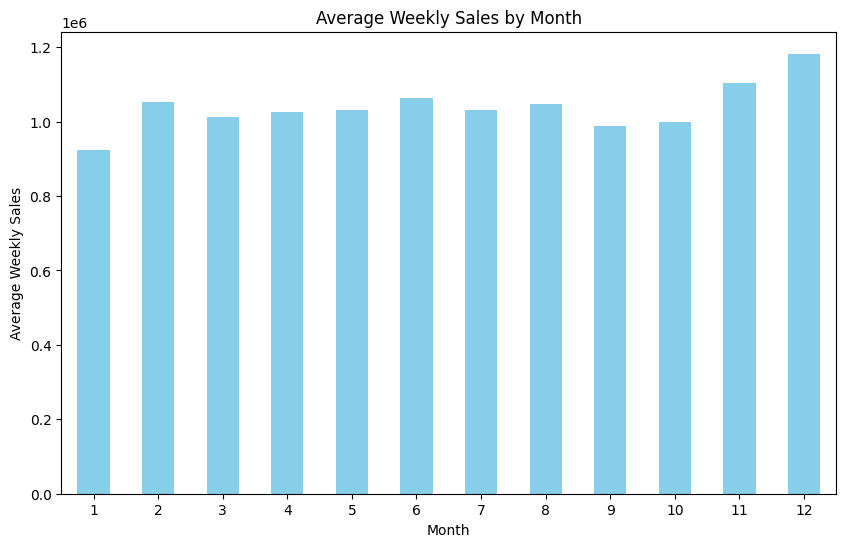

In [23]:
# Group by month and calculate average weekly sales
monthly_sales = df.groupby('Month')['Weekly_Sales'].mean()

# Plot monthly sales trends
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Average Weekly Sales by Month')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales')
plt.xticks(rotation=0)
plt.show()

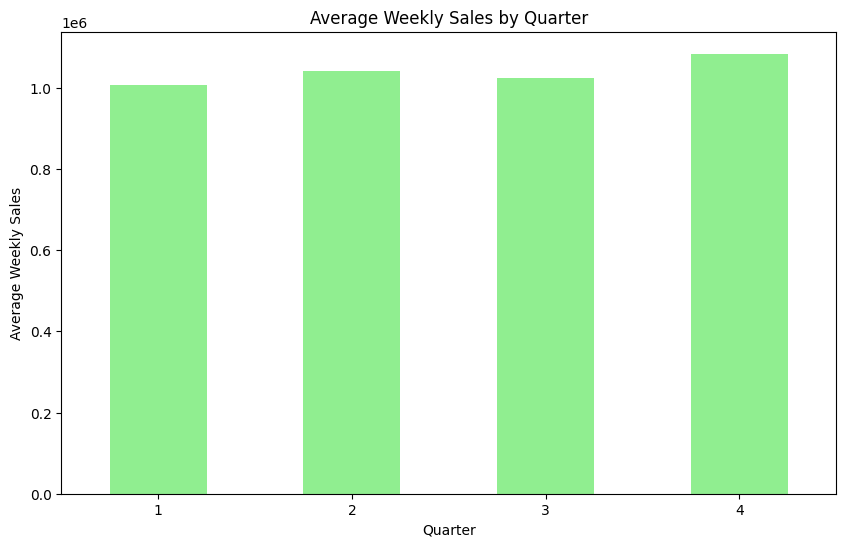

In [26]:
# Group by quarter and calculate average weekly sales
quarterly_sales = df.groupby('Quarter')['Weekly_Sales'].mean()

# Plot quarterly sales trends
plt.figure(figsize=(10, 6))
quarterly_sales.plot(kind='bar', color='lightgreen')
plt.title('Average Weekly Sales by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Average Weekly Sales')
plt.xticks(rotation=0)
plt.show()

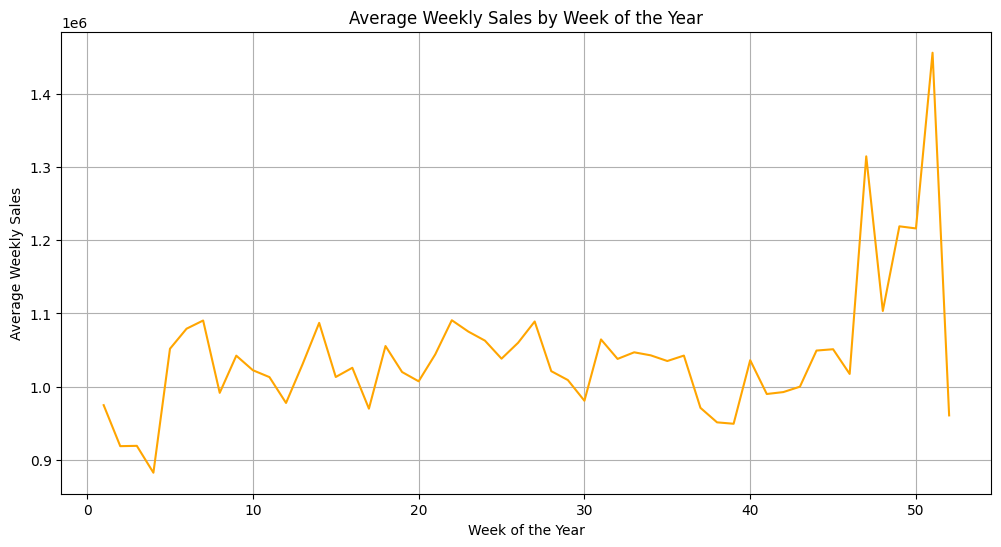

In [25]:
# Group by week of the year and calculate average weekly sales
weekly_sales = df.groupby('Week_of_Year')['Weekly_Sales'].mean()

# Plot weekly sales trends
plt.figure(figsize=(12, 6))
weekly_sales.plot(kind='line', color='orange')
plt.title('Average Weekly Sales by Week of the Year')
plt.xlabel('Week of the Year')
plt.ylabel('Average Weekly Sales')
plt.grid()
plt.show()


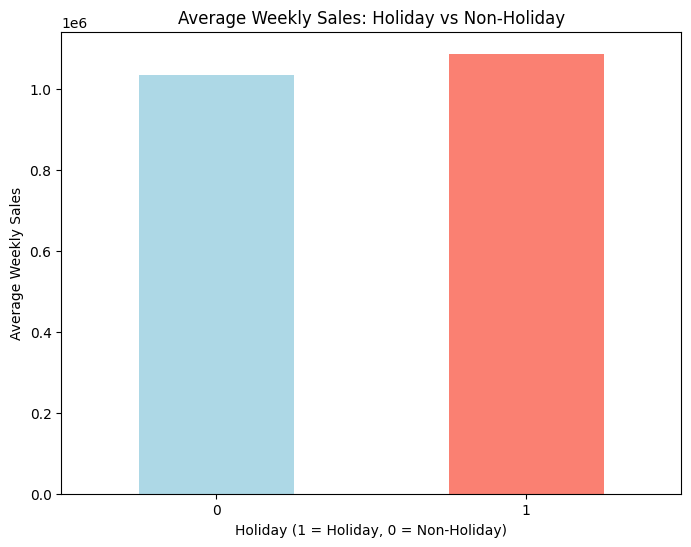

In [24]:
# Group by Holiday_Flag and calculate average weekly sales
holiday_sales = df.groupby('Holiday_Flag')['Weekly_Sales'].mean()

# Plot holiday vs non-holiday sales
plt.figure(figsize=(8, 6))
holiday_sales.plot(kind='bar', color=['lightblue', 'salmon'])
plt.title('Average Weekly Sales: Holiday vs Non-Holiday')
plt.xlabel('Holiday (1 = Holiday, 0 = Non-Holiday)')
plt.ylabel('Average Weekly Sales')
plt.xticks(rotation=0)
plt.show()

In [ ]:
#Q3

In [27]:
# Correlation between Temperature and Weekly_Sales
correlation = df['Temperature'].corr(df['Weekly_Sales'])
print(f"Correlation between Temperature and Weekly_Sales: {correlation}")

Correlation between Temperature and Weekly_Sales: -0.04587356718637458


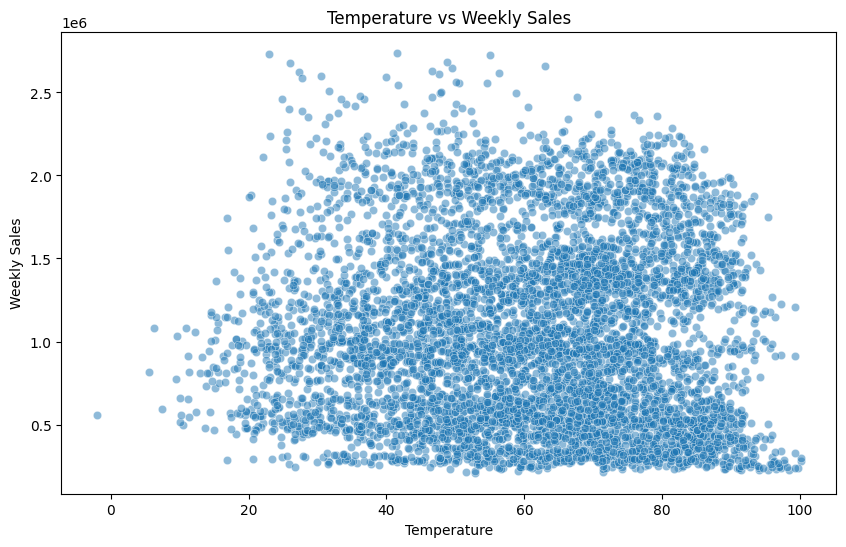

In [28]:
# Scatter plot of Temperature vs Weekly_Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=df, alpha=0.5)
plt.title('Temperature vs Weekly Sales')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.show()

<ipython-input-29-45f7eebc7147>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Temperature_Range'] = pd.cut(df['Temperature'], bins=[-20, 40, 70, 100], labels=['Cold', 'Moderate', 'Hot'])
<ipython-input-29-45f7eebc7147>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temperature_sales = df.groupby('Temperature_Range')['Weekly_Sales'].mean()


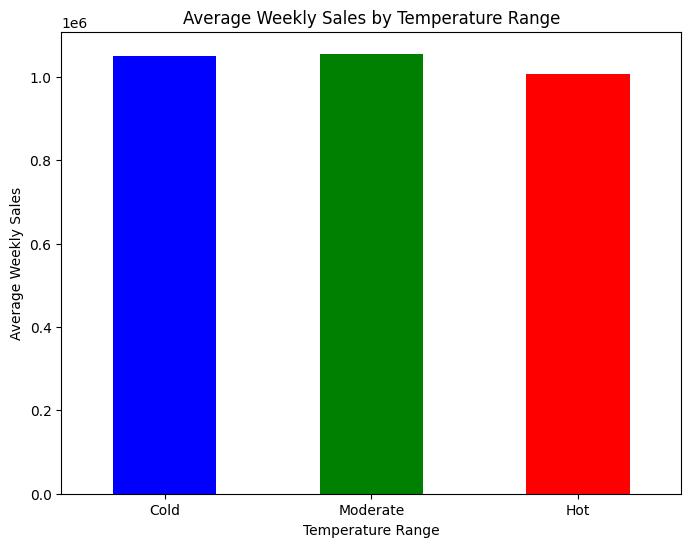

In [29]:
# Create temperature ranges
df['Temperature_Range'] = pd.cut(df['Temperature'], bins=[-20, 40, 70, 100], labels=['Cold', 'Moderate', 'Hot'])

# Group by temperature range and calculate average weekly sales
temperature_sales = df.groupby('Temperature_Range')['Weekly_Sales'].mean()

# Plot average sales by temperature range
plt.figure(figsize=(8, 6))
temperature_sales.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Average Weekly Sales by Temperature Range')
plt.xlabel('Temperature Range')
plt.ylabel('Average Weekly Sales')
plt.xticks(rotation=0)
plt.show()

In [30]:
from sklearn.linear_model import LinearRegression

# Fit a linear regression model
X = df[['Temperature']]
y = df['Weekly_Sales']
model = LinearRegression()
model.fit(X, y)

# Print the slope and intercept
print(f"Slope (Impact of Temperature on Sales): {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

Slope (Impact of Temperature on Sales): -1360.491578197915
Intercept: 1119592.0884206868


In [31]:
# Group by Store and calculate correlation between Temperature and Weekly_Sales
store_correlations = []
for store in df['Store'].unique():
    store_data = df[df['Store'] == store]
    correlation = store_data['Temperature'].corr(store_data['Weekly_Sales'])
    store_correlations.append({'Store': store, 'Correlation': correlation})

# Convert to DataFrame
store_correlations_df = pd.DataFrame(store_correlations)

# Sort by Correlation to identify stores most affected by temperature
store_correlations_df = store_correlations_df.sort_values(by='Correlation')

# Display the top 5 stores most affected by temperature
print("Stores most affected by temperature:")
print(store_correlations_df.head())

Stores most affected by temperature:
    Store  Correlation
9      10    -0.475243
11     12    -0.379416
2       3    -0.377524
27     28    -0.376506
29     30    -0.330816


In [32]:
# Correlation between CPI and Weekly_Sales
correlation = df['CPI'].corr(df['Weekly_Sales'])
print(f"Correlation between CPI and Weekly_Sales: {correlation}")

Correlation between CPI and Weekly_Sales: -0.0698023937730366


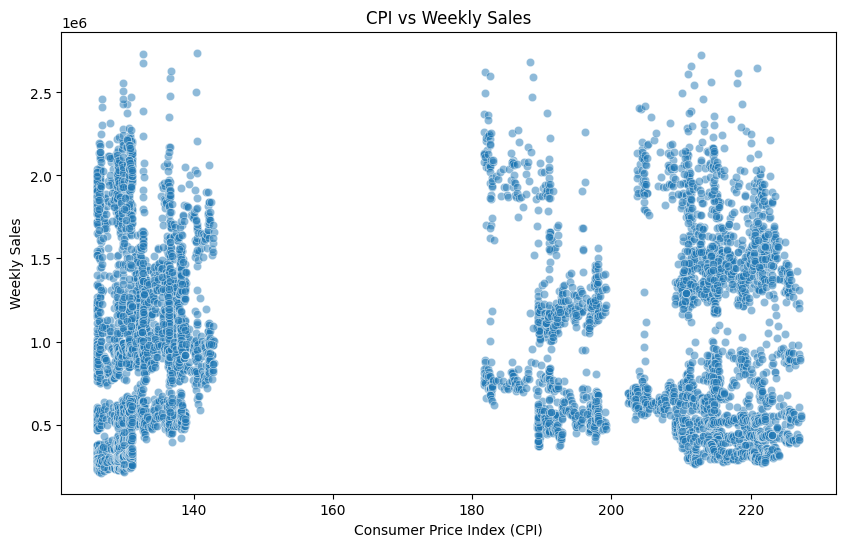

In [33]:
# Scatter plot of CPI vs Weekly_Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CPI', y='Weekly_Sales', data=df, alpha=0.5)
plt.title('CPI vs Weekly Sales')
plt.xlabel('Consumer Price Index (CPI)')
plt.ylabel('Weekly Sales')
plt.show()

<ipython-input-34-49ce4bb9352b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CPI_Range'] = pd.cut(df['CPI'], bins=[190, 200, 210, 220], labels=['Low', 'Medium', 'High'])
<ipython-input-34-49ce4bb9352b>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cpi_sales = df.groupby('CPI_Range')['Weekly_Sales'].mean()


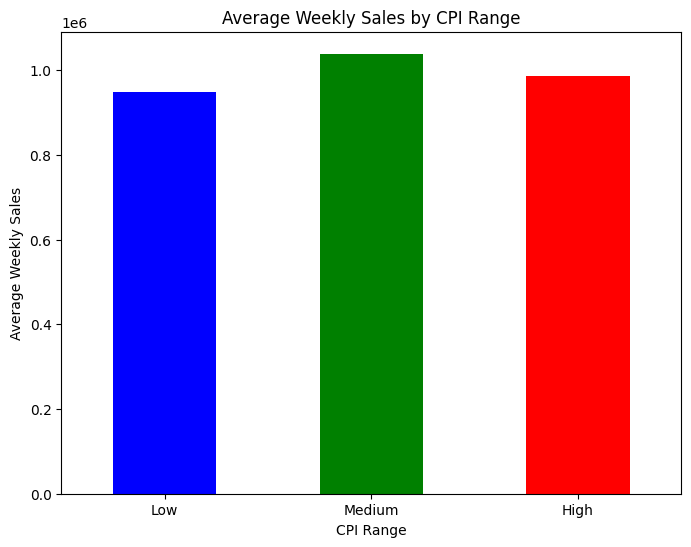

In [34]:
# Create CPI ranges
df['CPI_Range'] = pd.cut(df['CPI'], bins=[190, 200, 210, 220], labels=['Low', 'Medium', 'High'])

# Group by CPI range and calculate average weekly sales
cpi_sales = df.groupby('CPI_Range')['Weekly_Sales'].mean()

# Plot average sales by CPI range
plt.figure(figsize=(8, 6))
cpi_sales.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Average Weekly Sales by CPI Range')
plt.xlabel('CPI Range')
plt.ylabel('Average Weekly Sales')
plt.xticks(rotation=0)
plt.show()

In [35]:
from sklearn.linear_model import LinearRegression

# Fit a linear regression model
X = df[['CPI']]
y = df['Weekly_Sales']
model = LinearRegression()
model.fit(X, y)

# Print the slope and intercept
print(f"Slope (Impact of CPI on Sales): {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

Slope (Impact of CPI on Sales): -968.8621907181066
Intercept: 1203218.8656332882


In [36]:
# Group by Store and calculate correlation between CPI and Weekly_Sales
store_correlations = []
for store in df['Store'].unique():
    store_data = df[df['Store'] == store]
    correlation = store_data['CPI'].corr(store_data['Weekly_Sales'])
    store_correlations.append({'Store': store, 'Correlation': correlation})

# Convert to DataFrame
store_correlations_df = pd.DataFrame(store_correlations)

# Sort by Correlation to identify stores most affected by CPI
store_correlations_df = store_correlations_df.sort_values(by='Correlation')

# Display the top 5 stores most affected by CPI
print("Stores most affected by CPI:")
print(store_correlations_df.head())

Stores most affected by CPI:
    Store  Correlation
35     36    -0.915095
13     14    -0.498495
34     35    -0.424107
29     30    -0.298188
42     43    -0.285686


In [ ]:
#Q4

In [37]:
# Group by Store and calculate total and average weekly sales
store_performance = df.groupby('Store').agg({
    'Weekly_Sales': ['sum', 'mean']
}).reset_index()

# Rename columns for clarity
store_performance.columns = ['Store', 'Total_Sales', 'Average_Sales']

# Sort by Total_Sales to identify top and worst-performing stores
store_performance = store_performance.sort_values(by='Total_Sales', ascending=False)

# Display the top 5 and bottom 5 stores
print("Top 5 Performing Stores:")
print(store_performance.head())

print("\nBottom 5 Performing Stores:")
print(store_performance.tail())

Top 5 Performing Stores:
    Store   Total_Sales  Average_Sales
3       4  2.810352e+08   2.051352e+06
19     20  2.800237e+08   2.058998e+06
13     14  2.761276e+08   1.986529e+06
1       2  2.687221e+08   1.905830e+06
12     13  2.682025e+08   1.957682e+06

Bottom 5 Performing Stores:
    Store  Total_Sales  Average_Sales
37     38  55159626.42  385731.653287
35     36  53412214.97  373511.992797
4       5  45475688.90  318011.810490
43     44  43293087.84  302748.866014
32     33  37160221.96  259861.692028


In [38]:
# Top 5 performing stores by total sales
top_stores = store_performance.head(5)
print("Top 5 Performing Stores by Total Sales:")
print(top_stores)

Top 5 Performing Stores by Total Sales:
    Store   Total_Sales  Average_Sales
3       4  2.810352e+08   2.051352e+06
19     20  2.800237e+08   2.058998e+06
13     14  2.761276e+08   1.986529e+06
1       2  2.687221e+08   1.905830e+06
12     13  2.682025e+08   1.957682e+06


In [ ]:
#Q5

In [39]:
# Worst-performing store by total sales
worst_store = store_performance.tail(1)
print("Worst-Performing Store by Total Sales:")
print(worst_store)

Worst-Performing Store by Total Sales:
    Store  Total_Sales  Average_Sales
32     33  37160221.96  259861.692028


In [40]:
# Highest and lowest performing stores
highest_sales = store_performance.iloc[0]['Total_Sales']
lowest_sales = store_performance.iloc[-1]['Total_Sales']

# Calculate the difference
sales_difference = highest_sales - lowest_sales

# Calculate the percentage difference
percentage_difference = (sales_difference / highest_sales) * 100

print(f"Difference in Total Sales between Highest and Lowest Performing Stores: ${sales_difference:,.2f}")
print(f"Percentage Difference: {percentage_difference:.2f}%")

Difference in Total Sales between Highest and Lowest Performing Stores: $243,875,002.96
Percentage Difference: 86.78%


<ipython-input-41-7a24d4eddaeb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Store', y='Total_Sales', data=store_performance, palette='viridis')


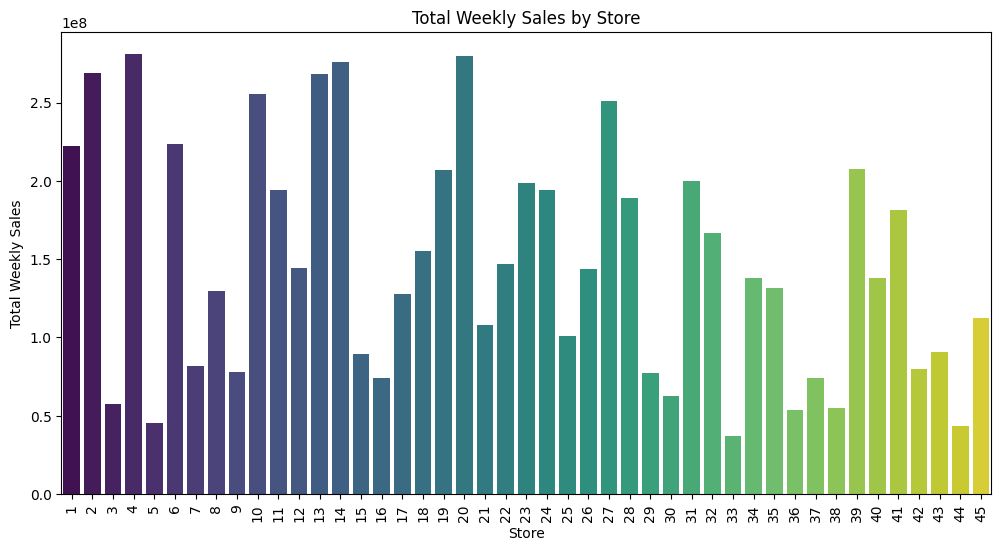

In [41]:
# Plot total sales by store
plt.figure(figsize=(12, 6))
sns.barplot(x='Store', y='Total_Sales', data=store_performance, palette='viridis')
plt.title('Total Weekly Sales by Store')
plt.xlabel('Store')
plt.ylabel('Total Weekly Sales')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Q Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks.

In [43]:
# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

df = df.sort_values(by=['Store', 'Date'])

In [44]:
# Create a dictionary to store data for each store
store_data = {store: df[df['Store'] == store] for store in df['Store'].unique()}

In [45]:
! pip install prophet

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/bj89hfzf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/ror63yla.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82612', 'data', 'file=/tmp/tmphvfwh82f/bj89hfzf.json', 'init=/tmp/tmphvfwh82f/ror63yla.json', 'output', 'file=/tmp/tmphvfwh82f/prophet_modelf29lcf__/prophet_model-20250308162231.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:22:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:22:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


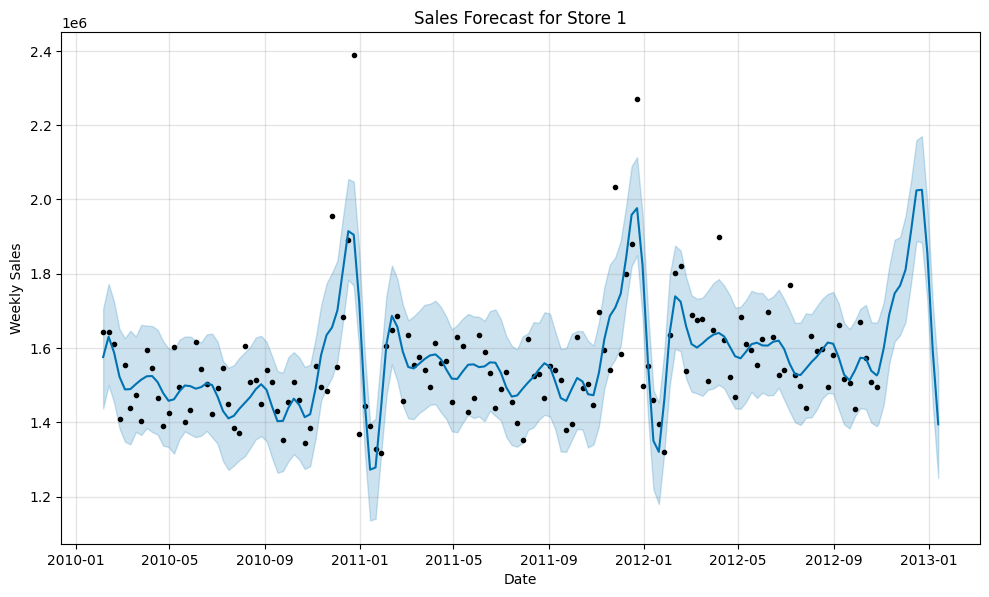

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/zt84347_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/4qangv6h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71549', 'data', 'file=/tmp/tmphvfwh82f/zt84347_.json', 'init=/tmp/tmphvfwh82f/4qangv6h.json', 'output', 'file=/tmp/tmphvfwh82f/prophet_modelqj9y9lll/prophet_model-20250308162233.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:22:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:22:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


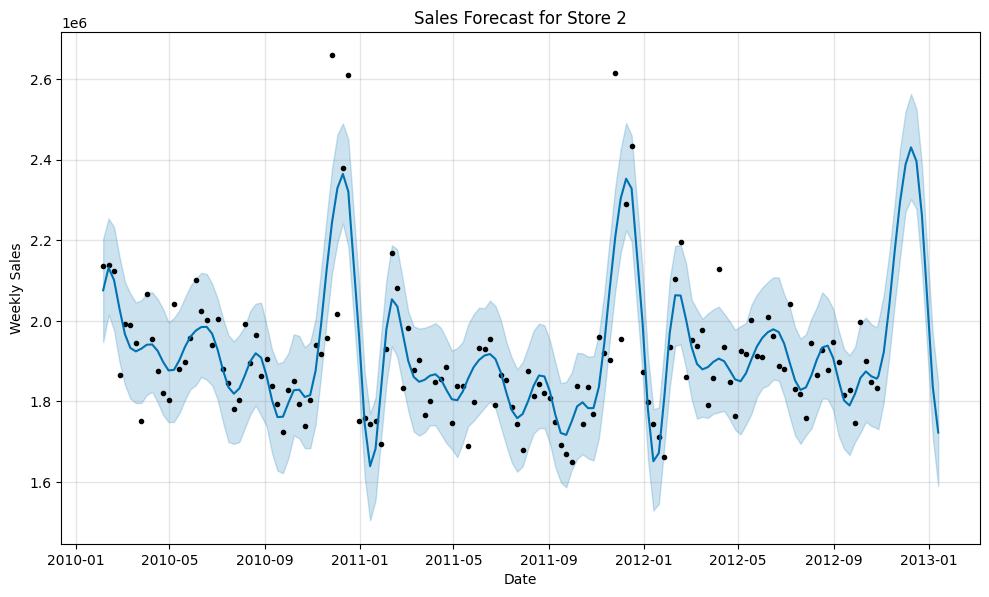

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/qwuyyydq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/kxp817y4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1720', 'data', 'file=/tmp/tmphvfwh82f/qwuyyydq.json', 'init=/tmp/tmphvfwh82f/kxp817y4.json', 'output', 'file=/tmp/tmphvfwh82f/prophet_modelrrclvhq1/prophet_model-20250308162235.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:22:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:22:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


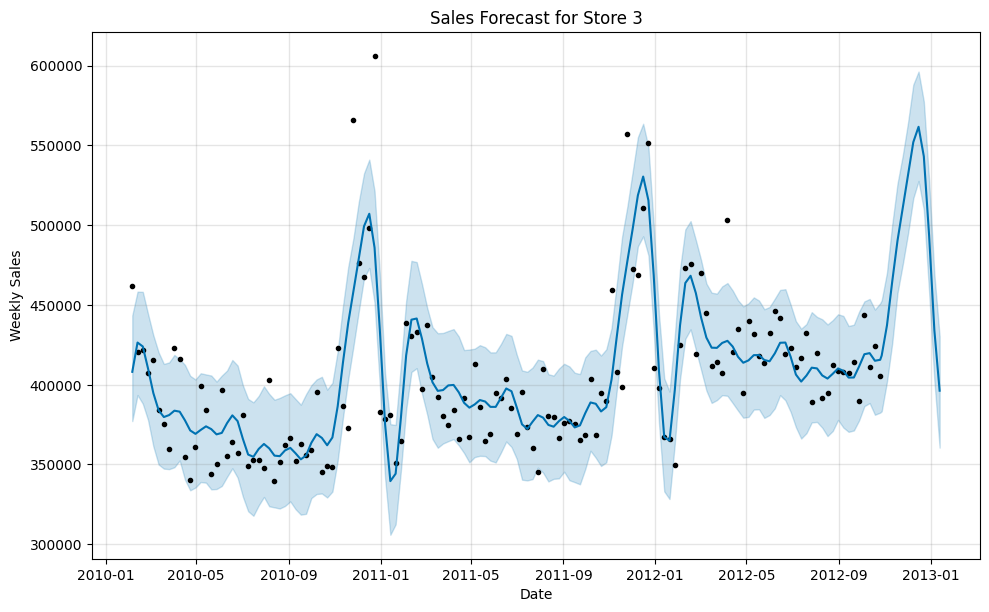

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/ogbh35l3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/jm0xzzaq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77709', 'data', 'file=/tmp/tmphvfwh82f/ogbh35l3.json', 'init=/tmp/tmphvfwh82f/jm0xzzaq.json', 'output', 'file=/tmp/tmphvfwh82f/prophet_modelfhyjmfho/prophet_model-20250308162235.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:22:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:22:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


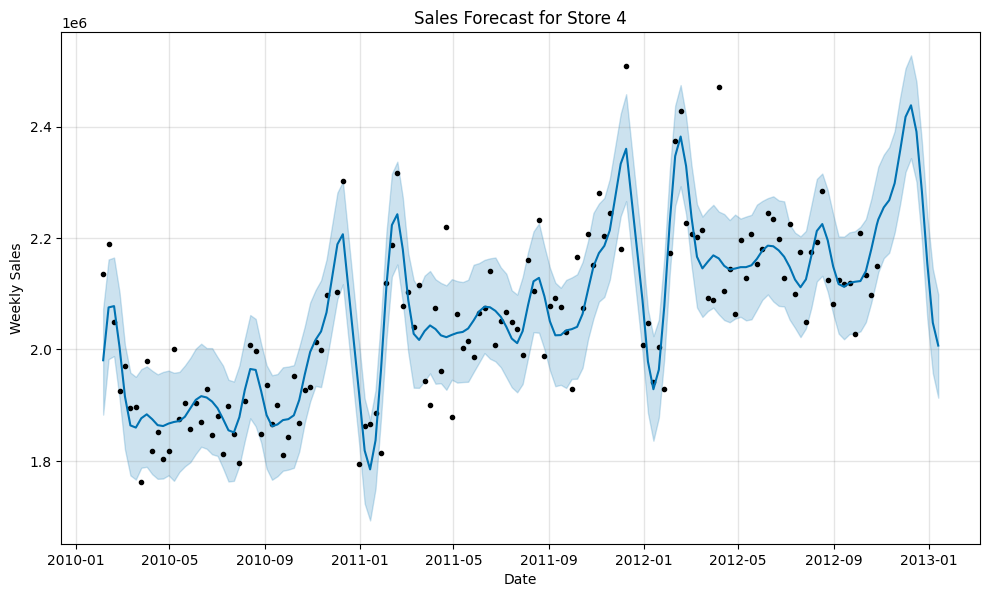

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/_v3abw_r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/6sdc0vkd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23170', 'data', 'file=/tmp/tmphvfwh82f/_v3abw_r.json', 'init=/tmp/tmphvfwh82f/6sdc0vkd.json', 'output', 'file=/tmp/tmphvfwh82f/prophet_modelum_2bh73/prophet_model-20250308162237.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:22:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:22:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


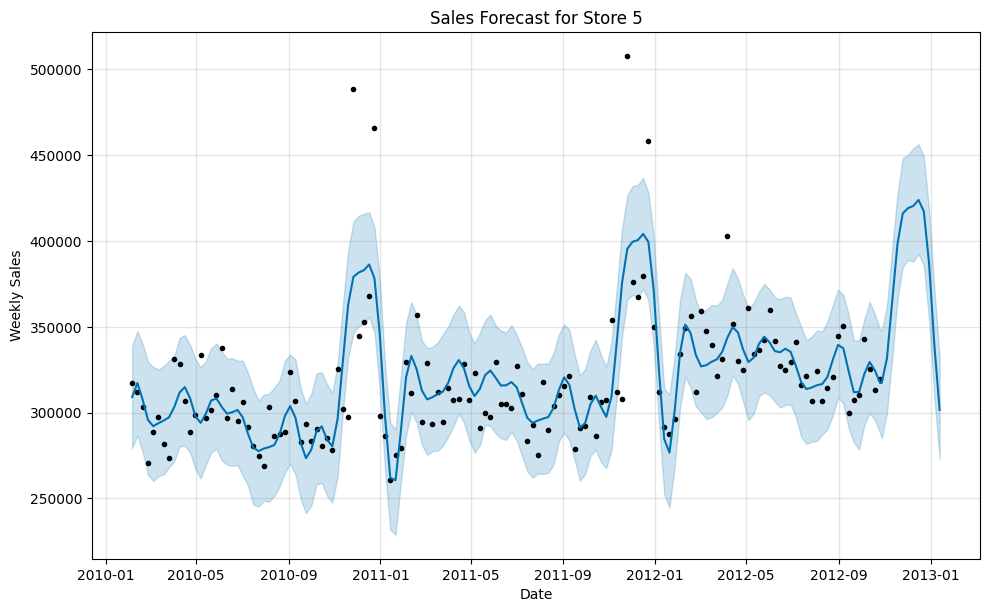

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/swf3a0ry.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/9xye5bh3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61963', 'data', 'file=/tmp/tmphvfwh82f/swf3a0ry.json', 'init=/tmp/tmphvfwh82f/9xye5bh3.json', 'output', 'file=/tmp/tmphvfwh82f/prophet_modelcl1ylsrs/prophet_model-20250308162238.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:22:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:22:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


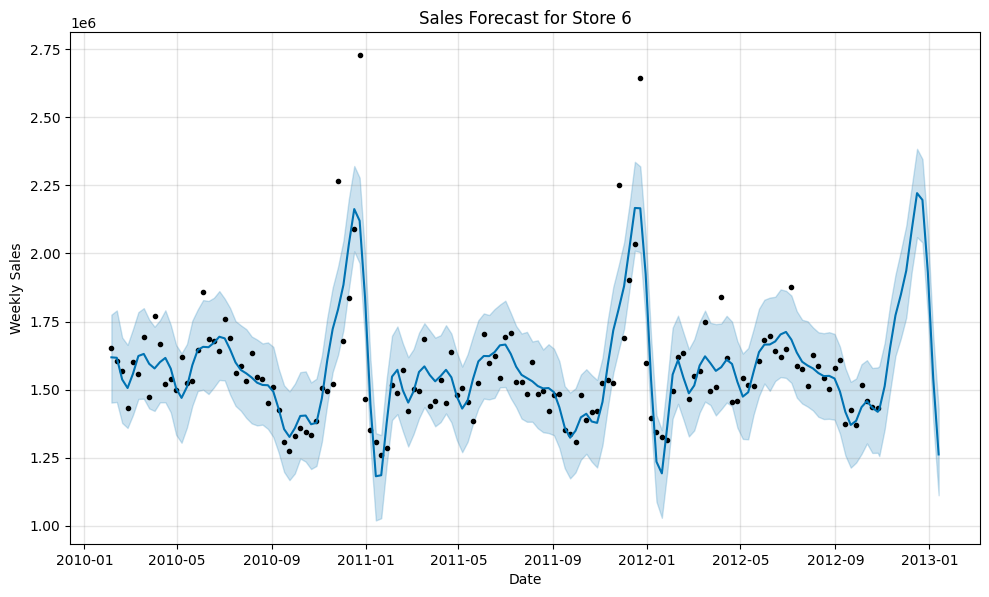

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/efyl3n08.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/kxnege28.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29566', 'data', 'file=/tmp/tmphvfwh82f/efyl3n08.json', 'init=/tmp/tmphvfwh82f/kxnege28.json', 'output', 'file=/tmp/tmphvfwh82f/prophet_modeldgyc4ta5/prophet_model-20250308162239.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:22:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:22:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


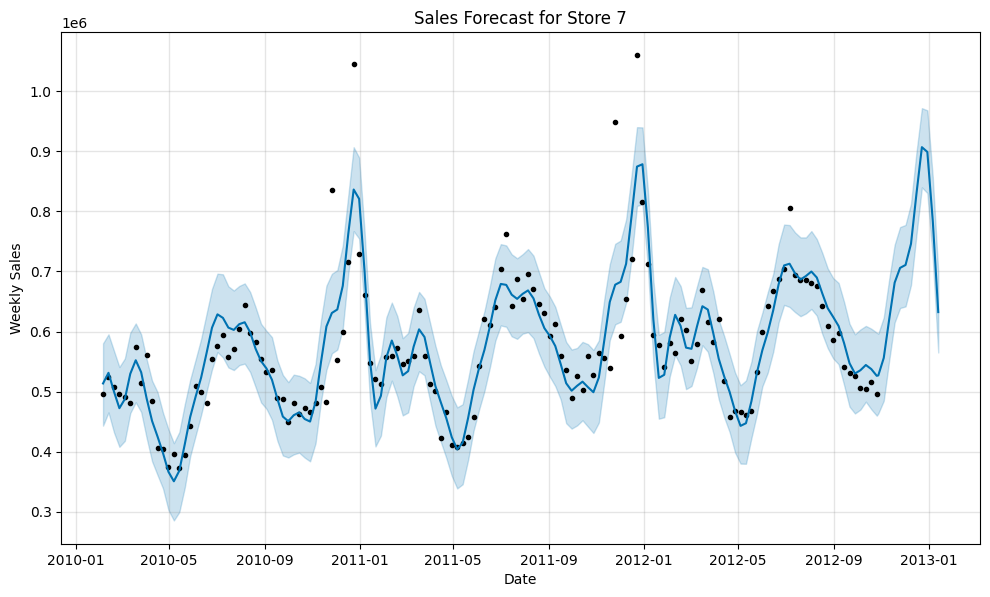

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/0_1ffk6l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/r5_h_9n3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17982', 'data', 'file=/tmp/tmphvfwh82f/0_1ffk6l.json', 'init=/tmp/tmphvfwh82f/r5_h_9n3.json', 'output', 'file=/tmp/tmphvfwh82f/prophet_modelhkx9323a/prophet_model-20250308162240.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:22:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:22:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


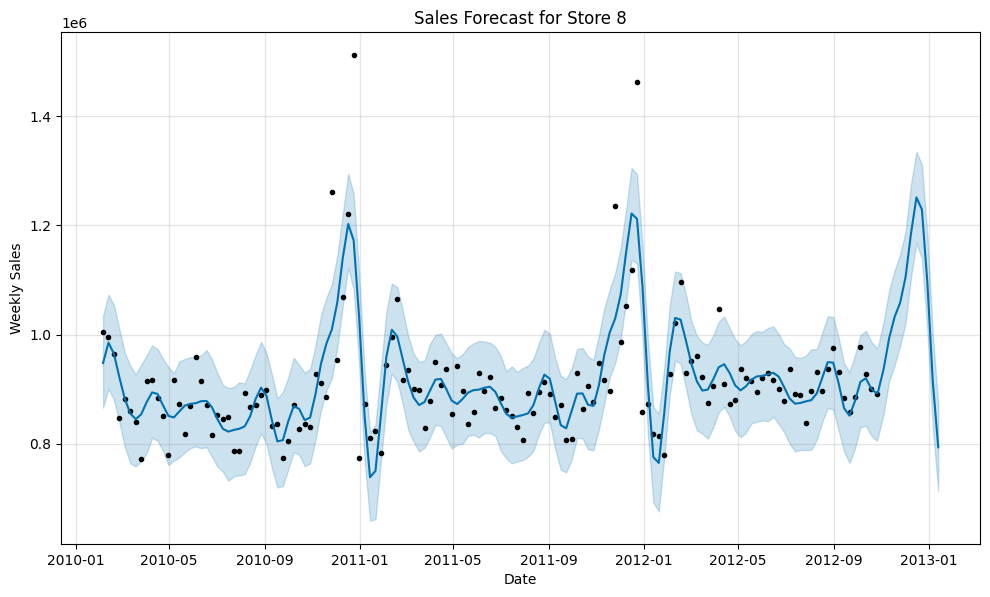

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/07ofpsm0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/a5wew3r_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83636', 'data', 'file=/tmp/tmphvfwh82f/07ofpsm0.json', 'init=/tmp/tmphvfwh82f/a5wew3r_.json', 'output', 'file=/tmp/tmphvfwh82f/prophet_modelzb3bzyts/prophet_model-20250308162241.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:22:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:22:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


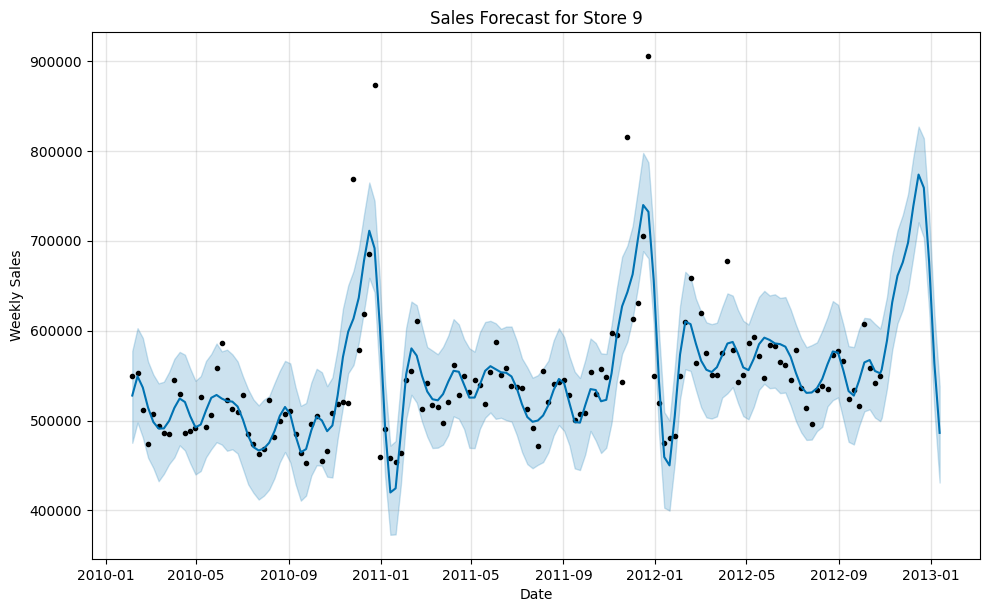

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/e99j9kw9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/o719acx4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86883', 'data', 'file=/tmp/tmphvfwh82f/e99j9kw9.json', 'init=/tmp/tmphvfwh82f/o719acx4.json', 'output', 'file=/tmp/tmphvfwh82f/prophet_modelk7ap9shf/prophet_model-20250308162242.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:22:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:22:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


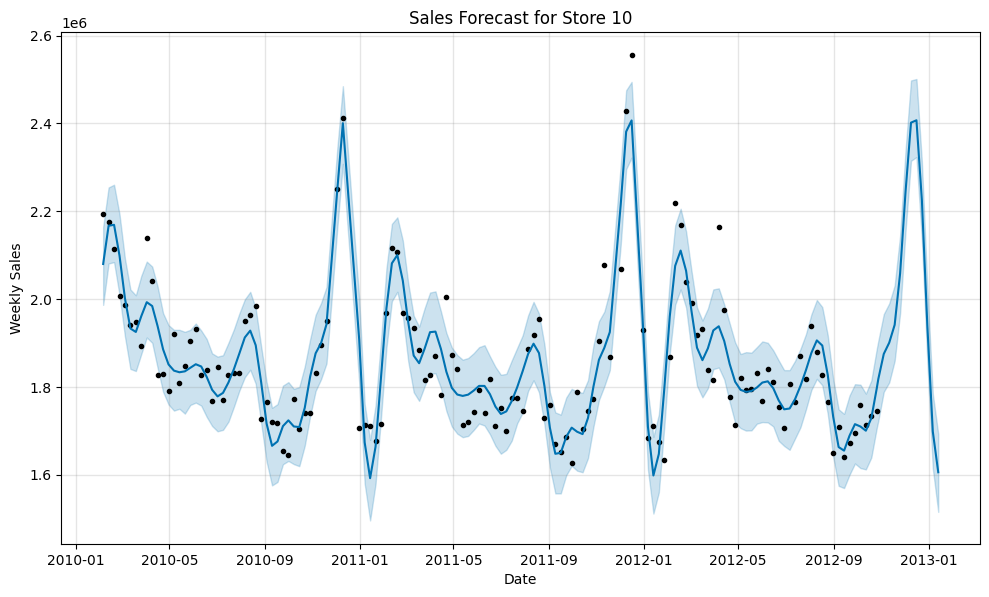

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/wkgb89k7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/kg0ft9ho.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83818', 'data', 'file=/tmp/tmphvfwh82f/wkgb89k7.json', 'init=/tmp/tmphvfwh82f/kg0ft9ho.json', 'output', 'file=/tmp/tmphvfwh82f/prophet_model9gzfhgp6/prophet_model-20250308162244.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:22:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:22:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


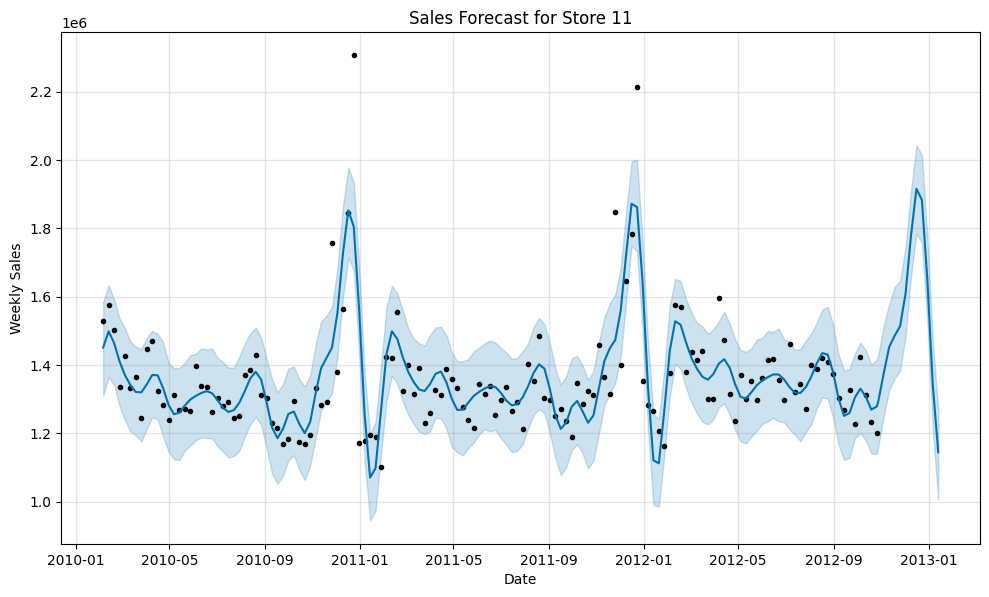

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/cgurr5z1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/ozod9uj2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84291', 'data', 'file=/tmp/tmphvfwh82f/cgurr5z1.json', 'init=/tmp/tmphvfwh82f/ozod9uj2.json', 'output', 'file=/tmp/tmphvfwh82f/prophet_model0svk8pjp/prophet_model-20250308162246.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:22:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:22:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


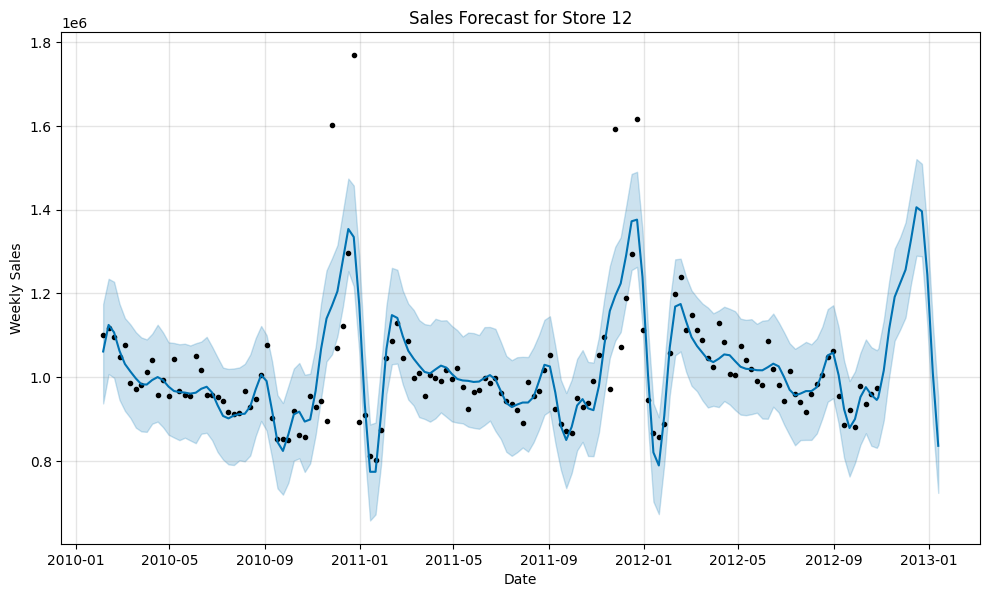

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/0kou6s63.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/2xj8voad.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54229', 'data', 'file=/tmp/tmphvfwh82f/0kou6s63.json', 'init=/tmp/tmphvfwh82f/2xj8voad.json', 'output', 'file=/tmp/tmphvfwh82f/prophet_modelzo91_tqp/prophet_model-20250308162247.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:22:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:22:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


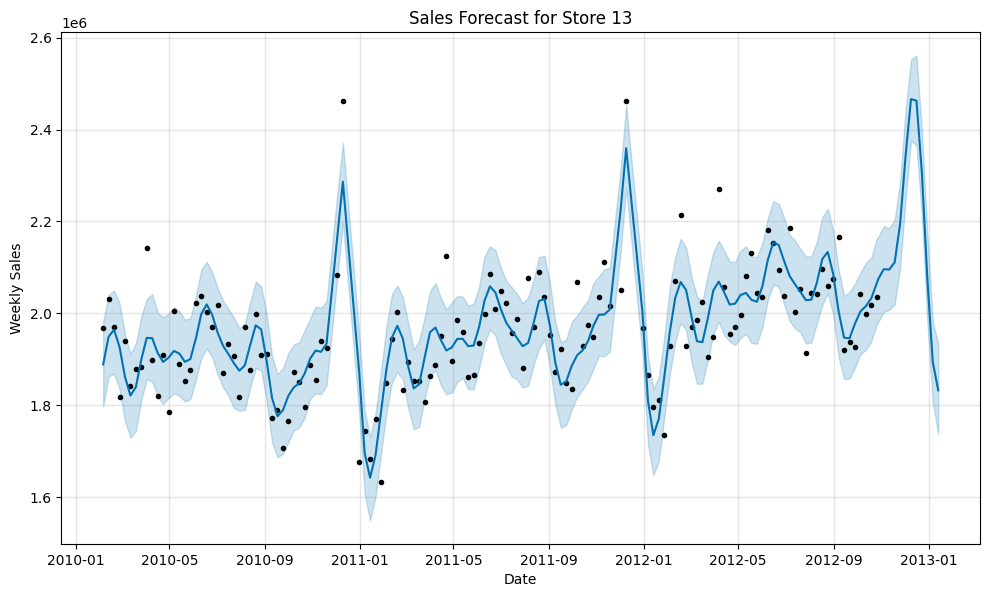

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/973rlbx4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/7h_59skm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64342', 'data', 'file=/tmp/tmphvfwh82f/973rlbx4.json', 'init=/tmp/tmphvfwh82f/7h_59skm.json', 'output', 'file=/tmp/tmphvfwh82f/prophet_model2xwzcni2/prophet_model-20250308162249.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:22:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:22:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


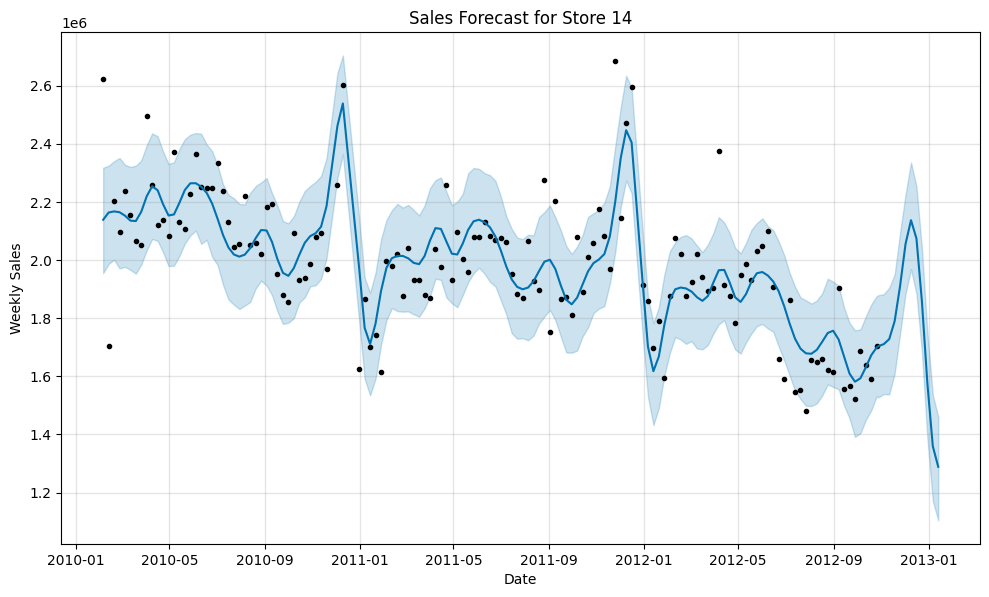

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/k5pbvv5r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/v0c8n09n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30020', 'data', 'file=/tmp/tmphvfwh82f/k5pbvv5r.json', 'init=/tmp/tmphvfwh82f/v0c8n09n.json', 'output', 'file=/tmp/tmphvfwh82f/prophet_modelxjiptsye/prophet_model-20250308162250.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:22:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:22:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


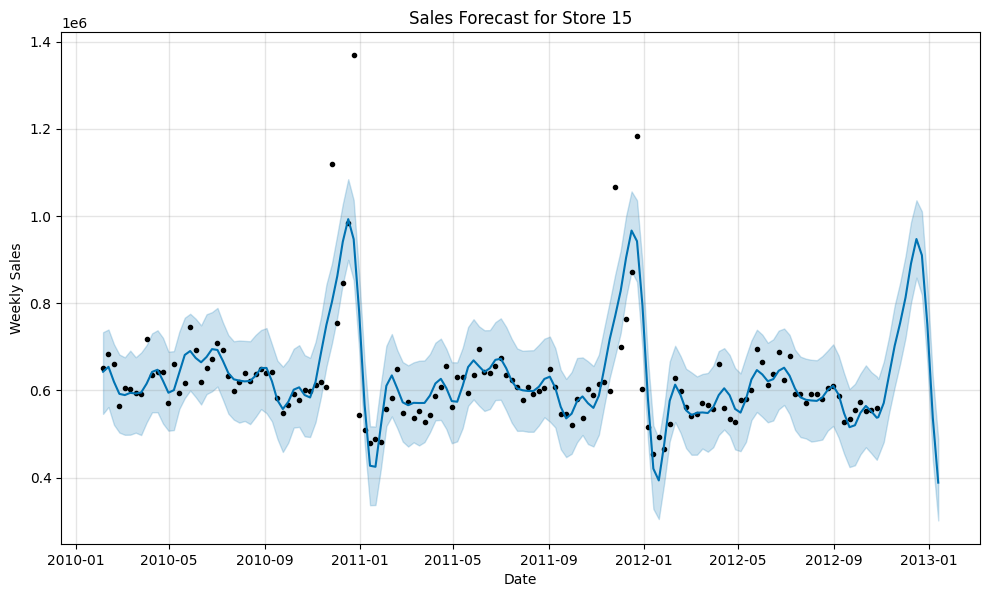

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/0x_8q003.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/n93w42ln.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93404', 'data', 'file=/tmp/tmphvfwh82f/0x_8q003.json', 'init=/tmp/tmphvfwh82f/n93w42ln.json', 'output', 'file=/tmp/tmphvfwh82f/prophet_model_vmb8m9x/prophet_model-20250308162251.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:22:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:22:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


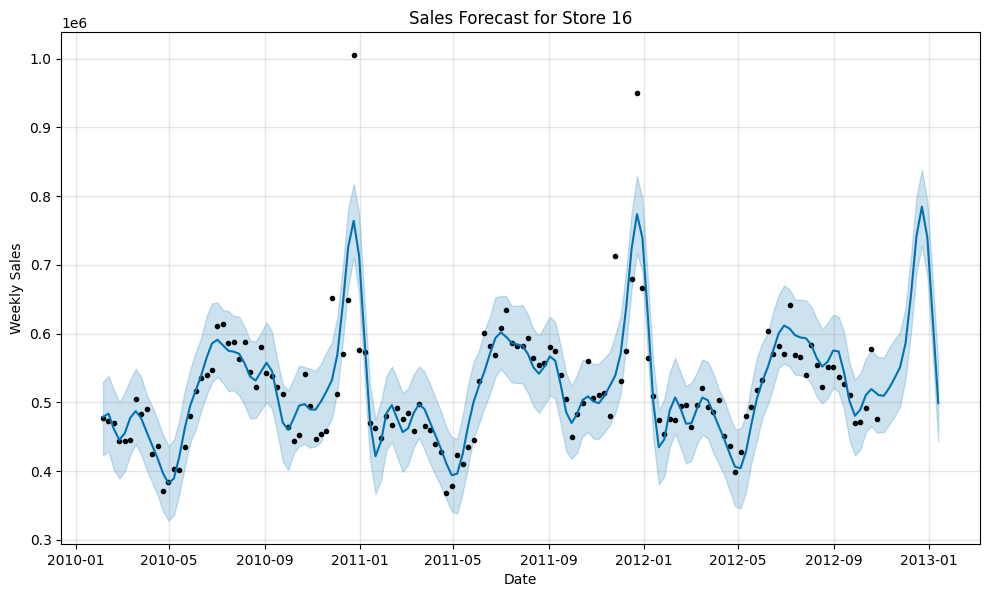

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/vf64xybl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/f43v64fo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96551', 'data', 'file=/tmp/tmphvfwh82f/vf64xybl.json', 'init=/tmp/tmphvfwh82f/f43v64fo.json', 'output', 'file=/tmp/tmphvfwh82f/prophet_modelm385afzx/prophet_model-20250308162252.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:22:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:22:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


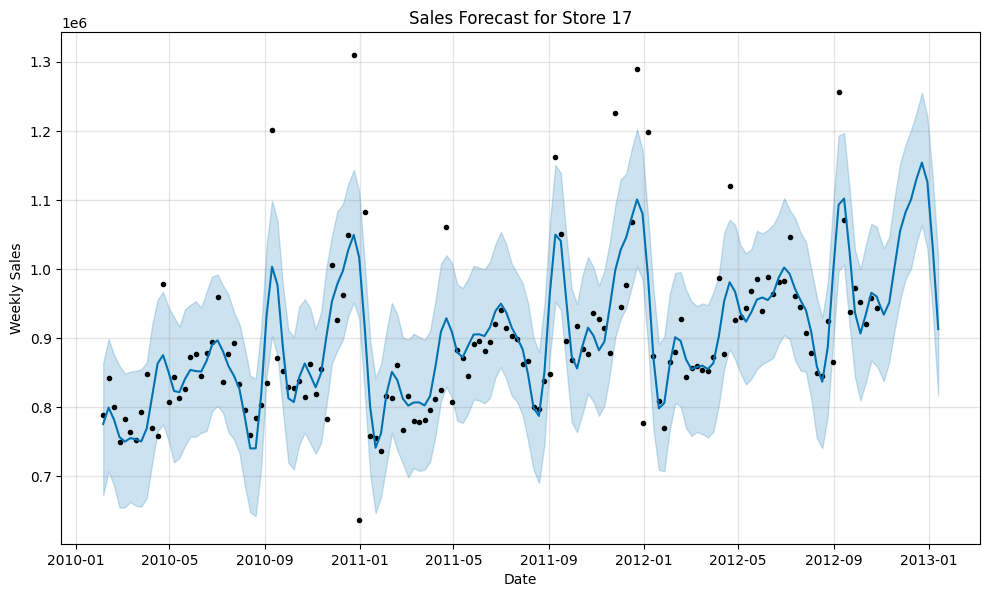

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/utb9thwo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/chuvzwsp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83050', 'data', 'file=/tmp/tmphvfwh82f/utb9thwo.json', 'init=/tmp/tmphvfwh82f/chuvzwsp.json', 'output', 'file=/tmp/tmphvfwh82f/prophet_modelxtd584t5/prophet_model-20250308162254.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:22:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:22:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


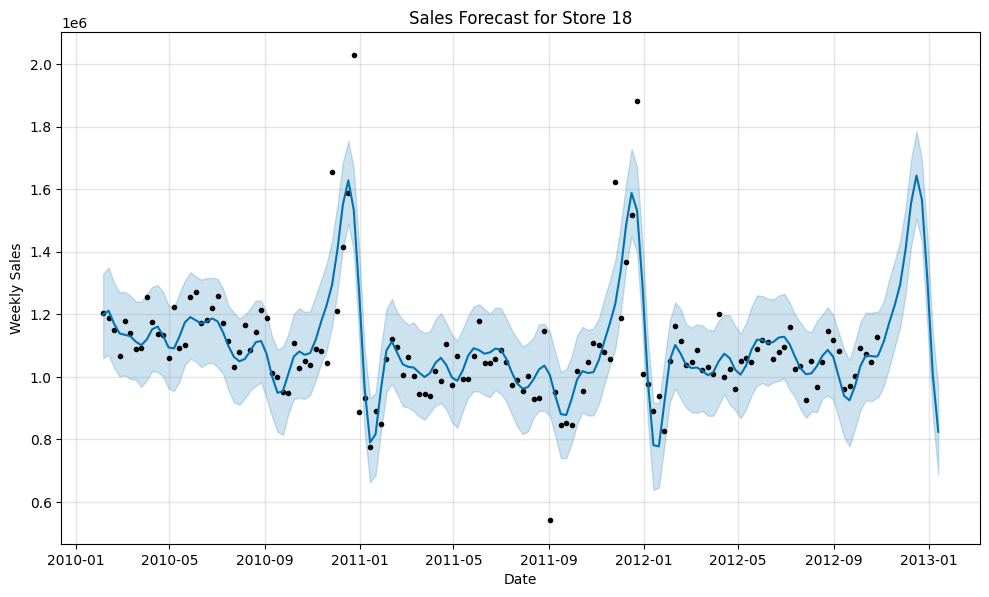

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/alp2zdii.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/b9odiw01.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62602', 'data', 'file=/tmp/tmphvfwh82f/alp2zdii.json', 'init=/tmp/tmphvfwh82f/b9odiw01.json', 'output', 'file=/tmp/tmphvfwh82f/prophet_model492au_4b/prophet_model-20250308162255.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:22:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:22:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


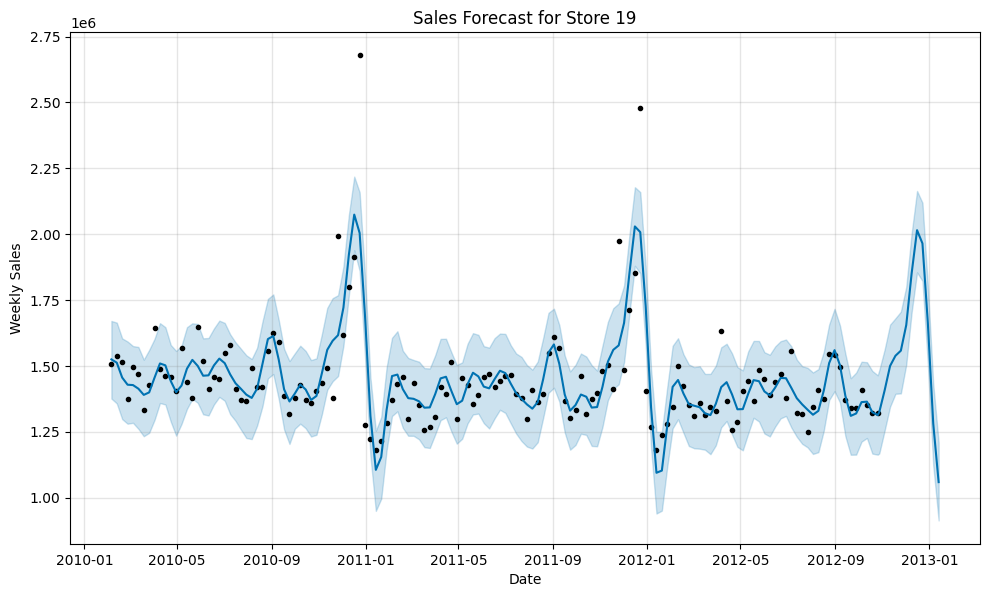

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/x7qx8bgx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/pz9vcynw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9883', 'data', 'file=/tmp/tmphvfwh82f/x7qx8bgx.json', 'init=/tmp/tmphvfwh82f/pz9vcynw.json', 'output', 'file=/tmp/tmphvfwh82f/prophet_model8n4l7n2n/prophet_model-20250308162255.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:22:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:22:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


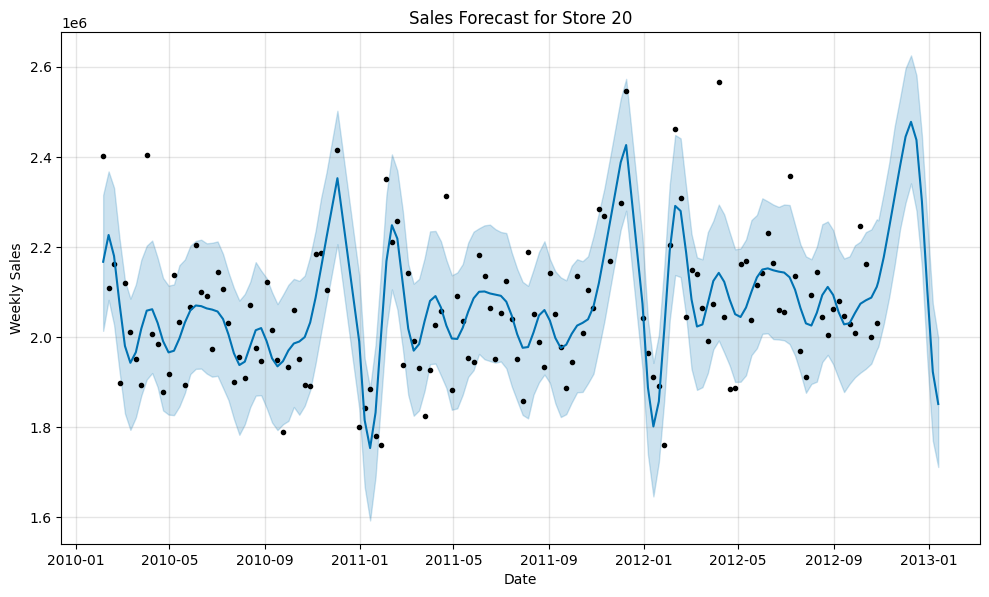

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/twlsb1a4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/063ci25q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63370', 'data', 'file=/tmp/tmphvfwh82f/twlsb1a4.json', 'init=/tmp/tmphvfwh82f/063ci25q.json', 'output', 'file=/tmp/tmphvfwh82f/prophet_model5701pbhj/prophet_model-20250308162256.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:22:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:22:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


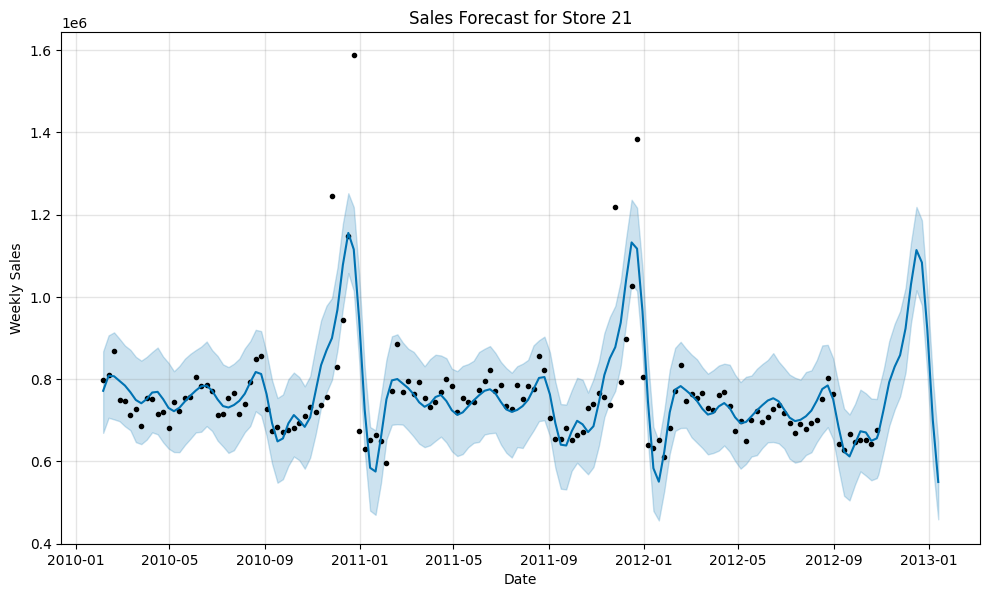

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/7yqlhqm3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/4go0u91i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89031', 'data', 'file=/tmp/tmphvfwh82f/7yqlhqm3.json', 'init=/tmp/tmphvfwh82f/4go0u91i.json', 'output', 'file=/tmp/tmphvfwh82f/prophet_model6tnaco9c/prophet_model-20250308162257.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:22:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:22:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


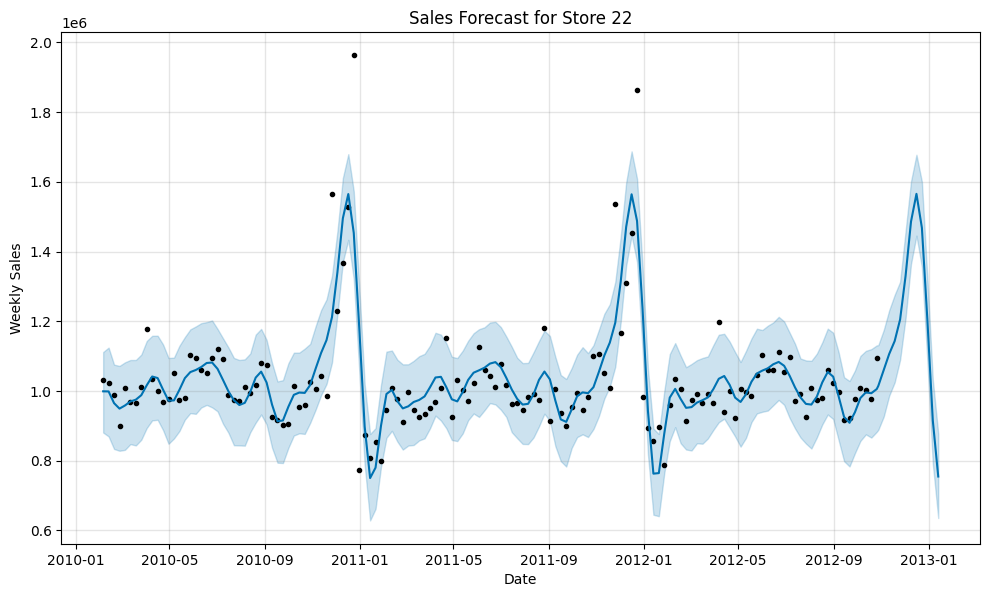

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/0lz2qngs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/es4c5pnz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25450', 'data', 'file=/tmp/tmphvfwh82f/0lz2qngs.json', 'init=/tmp/tmphvfwh82f/es4c5pnz.json', 'output', 'file=/tmp/tmphvfwh82f/prophet_modelzsz01es6/prophet_model-20250308162257.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:22:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:22:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


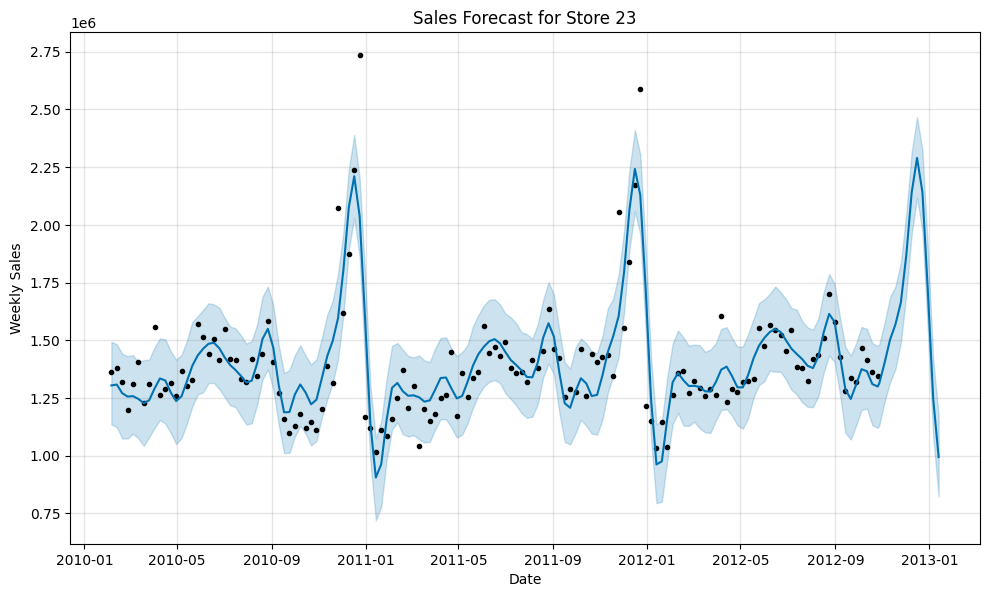

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/58mh0koi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/09euumfa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36912', 'data', 'file=/tmp/tmphvfwh82f/58mh0koi.json', 'init=/tmp/tmphvfwh82f/09euumfa.json', 'output', 'file=/tmp/tmphvfwh82f/prophet_model10xtgfhx/prophet_model-20250308162258.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:22:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:22:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


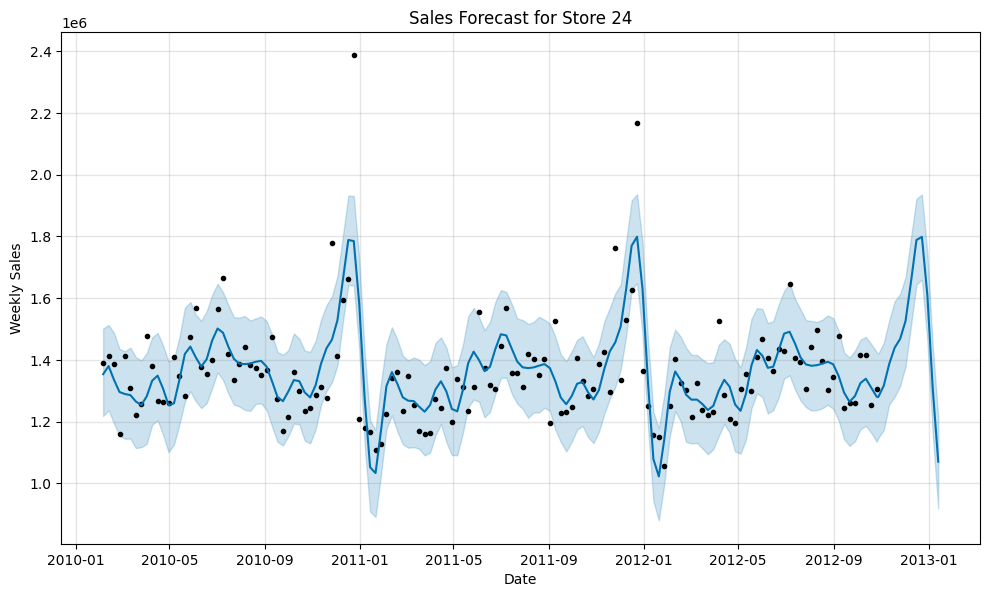

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/ph6gf798.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/yhte0p84.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51480', 'data', 'file=/tmp/tmphvfwh82f/ph6gf798.json', 'init=/tmp/tmphvfwh82f/yhte0p84.json', 'output', 'file=/tmp/tmphvfwh82f/prophet_modelz6t0_ssi/prophet_model-20250308162259.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:22:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:22:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


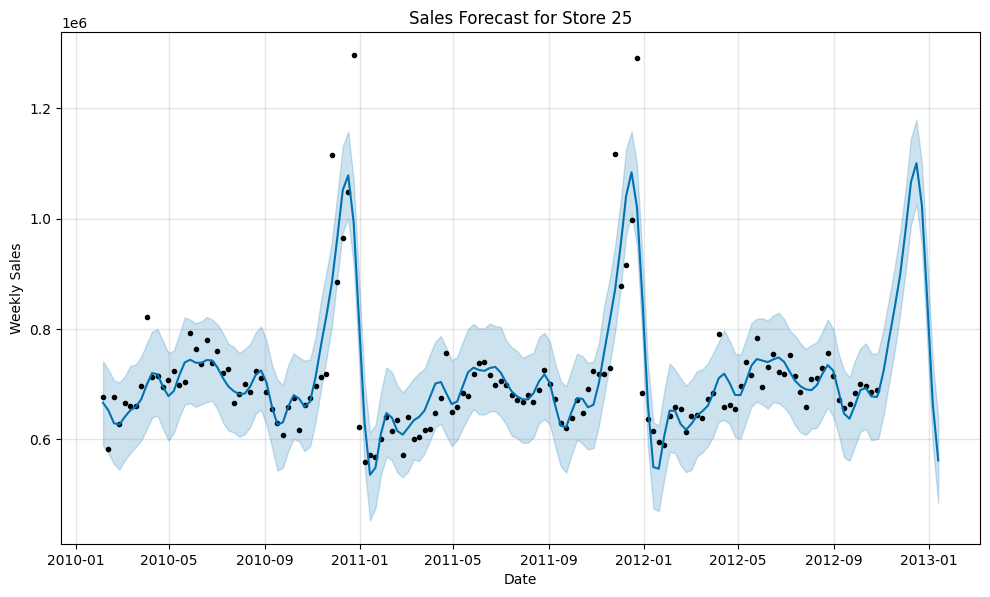

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/5t095qt2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/n7_zasbz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27584', 'data', 'file=/tmp/tmphvfwh82f/5t095qt2.json', 'init=/tmp/tmphvfwh82f/n7_zasbz.json', 'output', 'file=/tmp/tmphvfwh82f/prophet_modelhrof_bne/prophet_model-20250308162300.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:23:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:23:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


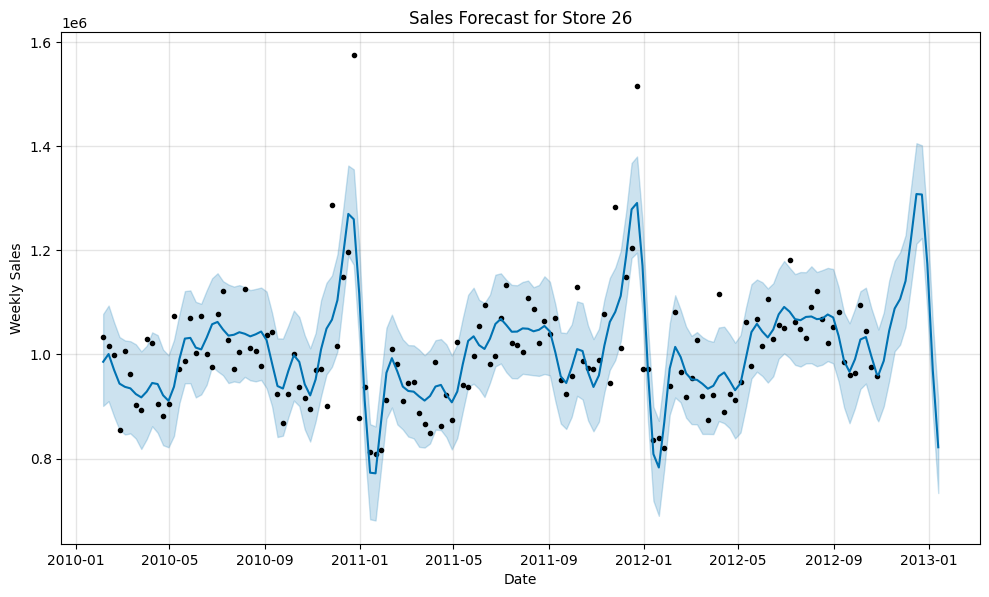

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/i1ity6jw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/7mwsthr7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7022', 'data', 'file=/tmp/tmphvfwh82f/i1ity6jw.json', 'init=/tmp/tmphvfwh82f/7mwsthr7.json', 'output', 'file=/tmp/tmphvfwh82f/prophet_modelkzxpuy4g/prophet_model-20250308162300.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:23:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:23:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


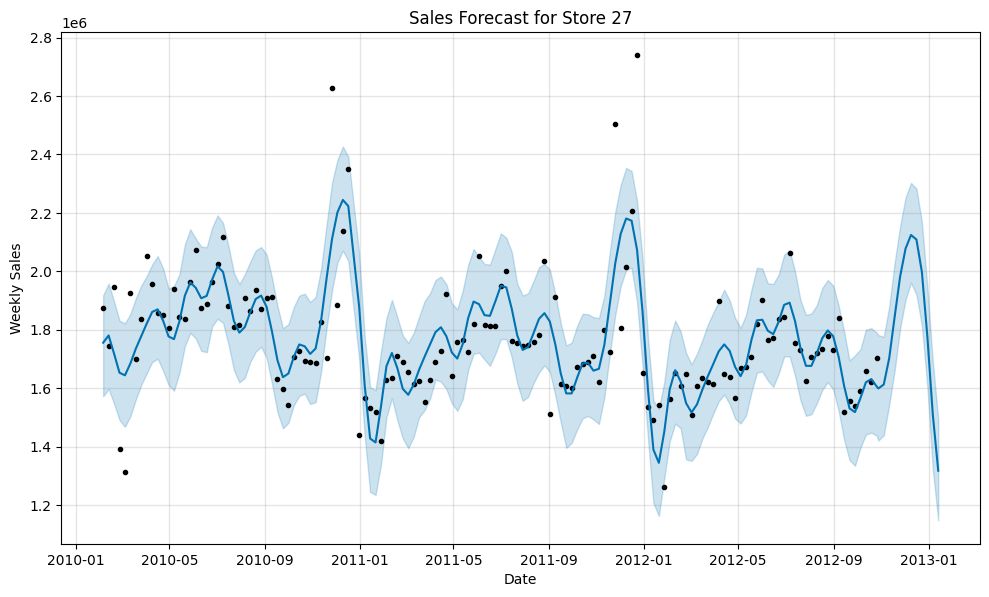

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/j_e8tdjo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/qcllc39k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34832', 'data', 'file=/tmp/tmphvfwh82f/j_e8tdjo.json', 'init=/tmp/tmphvfwh82f/qcllc39k.json', 'output', 'file=/tmp/tmphvfwh82f/prophet_modelngtdaryy/prophet_model-20250308162301.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:23:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:23:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


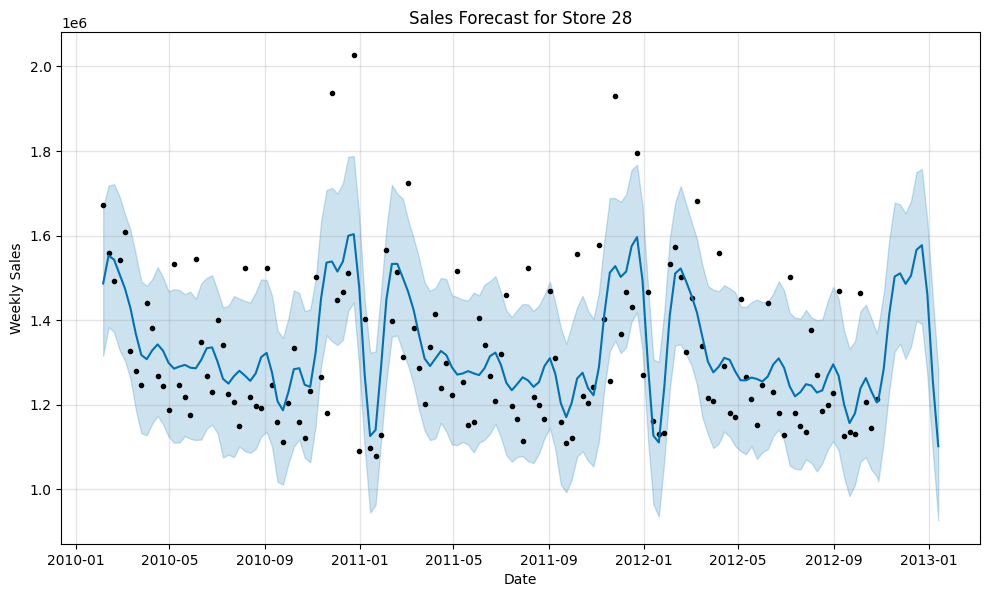

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/iy67o0uo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/ex23_hv7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44248', 'data', 'file=/tmp/tmphvfwh82f/iy67o0uo.json', 'init=/tmp/tmphvfwh82f/ex23_hv7.json', 'output', 'file=/tmp/tmphvfwh82f/prophet_model9v47hwxq/prophet_model-20250308162302.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:23:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:23:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


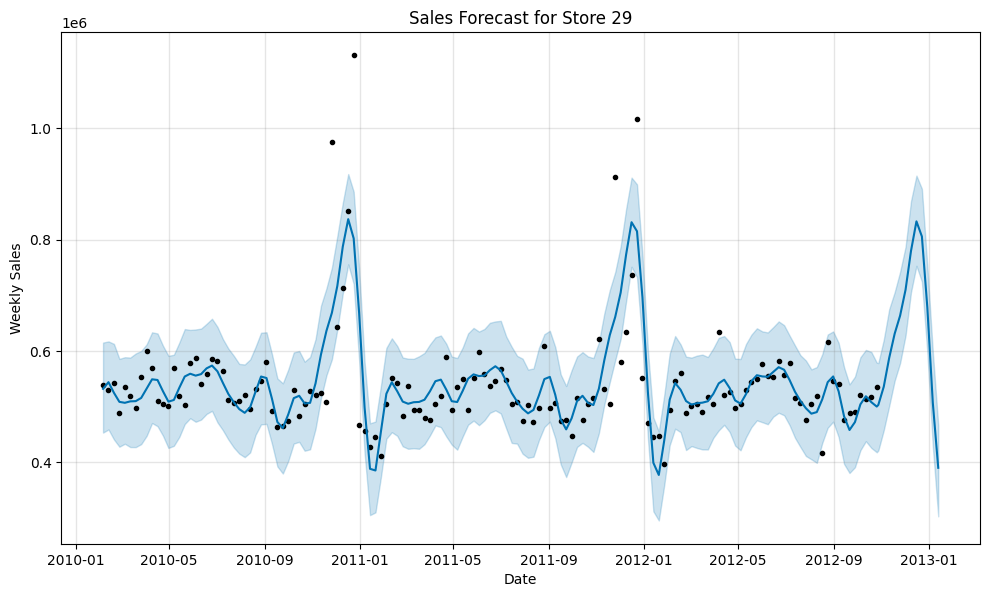

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/ghk5nij2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/bbv_nrd1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25995', 'data', 'file=/tmp/tmphvfwh82f/ghk5nij2.json', 'init=/tmp/tmphvfwh82f/bbv_nrd1.json', 'output', 'file=/tmp/tmphvfwh82f/prophet_modeldktm36lw/prophet_model-20250308162303.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:23:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:23:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


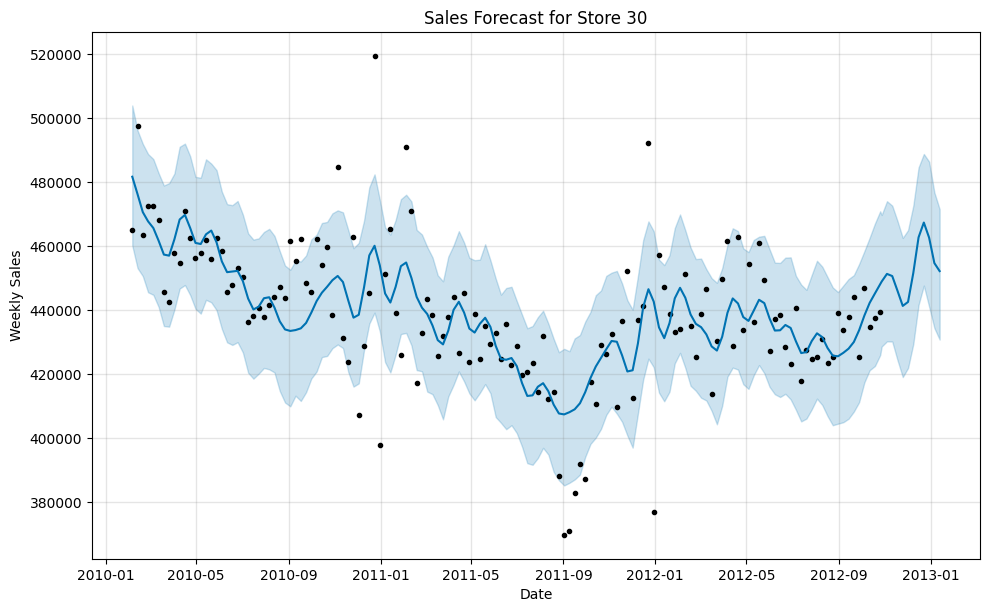

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/4glqgn3v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/xoqk63lh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73301', 'data', 'file=/tmp/tmphvfwh82f/4glqgn3v.json', 'init=/tmp/tmphvfwh82f/xoqk63lh.json', 'output', 'file=/tmp/tmphvfwh82f/prophet_modelp6apkbzj/prophet_model-20250308162303.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:23:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:23:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


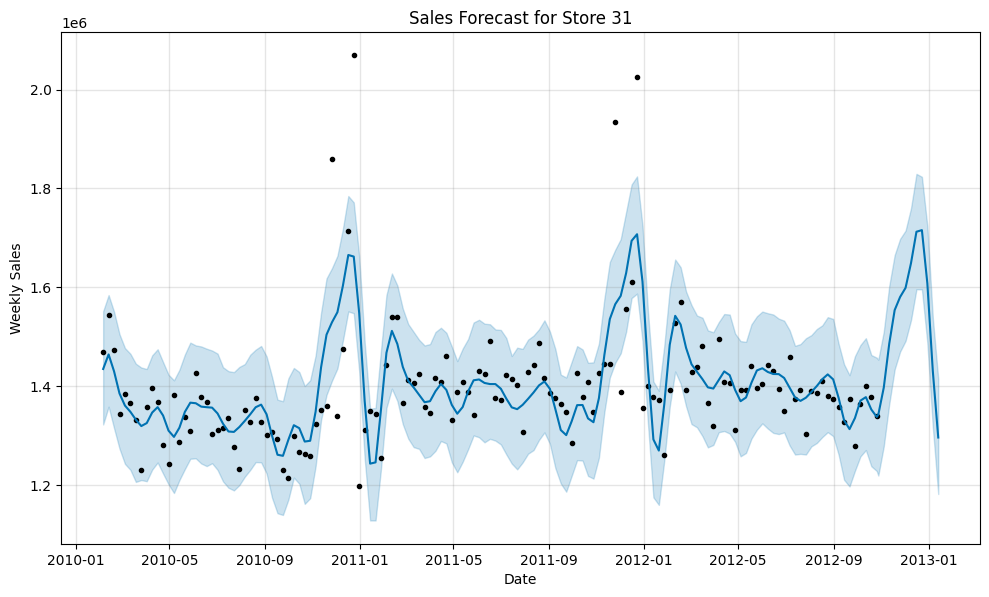

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/_2oey3iu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/j7eextly.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8198', 'data', 'file=/tmp/tmphvfwh82f/_2oey3iu.json', 'init=/tmp/tmphvfwh82f/j7eextly.json', 'output', 'file=/tmp/tmphvfwh82f/prophet_modelt7mbo29k/prophet_model-20250308162304.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:23:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:23:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


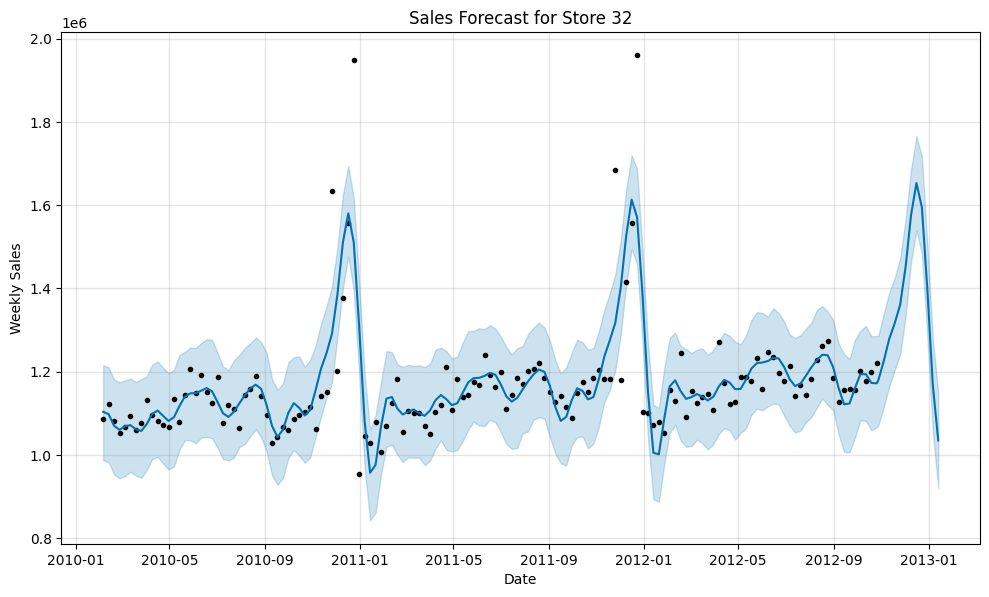

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/6zh55u5k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/9zkcq5fb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12835', 'data', 'file=/tmp/tmphvfwh82f/6zh55u5k.json', 'init=/tmp/tmphvfwh82f/9zkcq5fb.json', 'output', 'file=/tmp/tmphvfwh82f/prophet_modeld5duvhxz/prophet_model-20250308162305.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:23:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:23:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


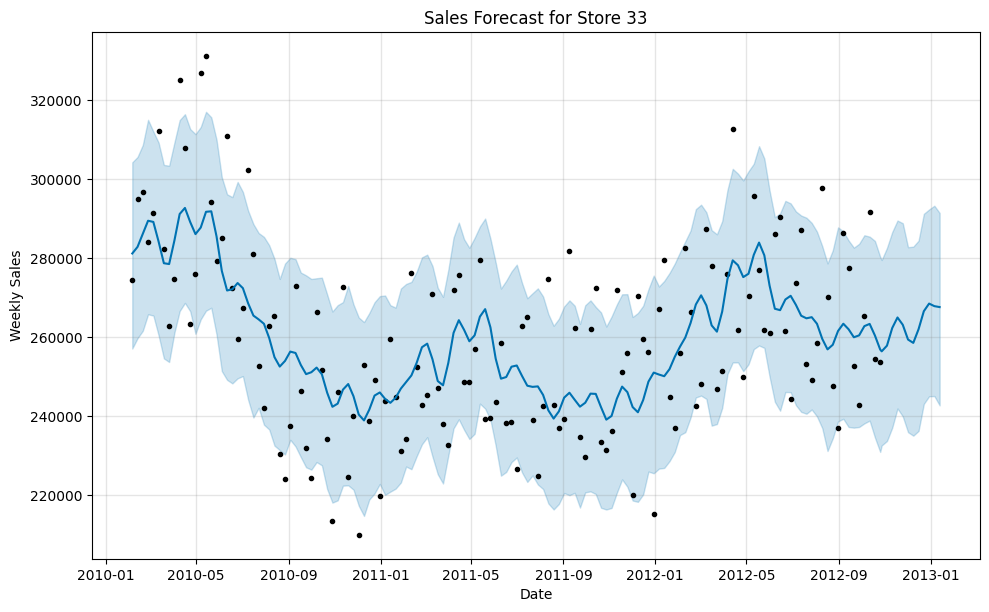

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/fx25ninn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/jsvqf85y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73125', 'data', 'file=/tmp/tmphvfwh82f/fx25ninn.json', 'init=/tmp/tmphvfwh82f/jsvqf85y.json', 'output', 'file=/tmp/tmphvfwh82f/prophet_model2tsdot6o/prophet_model-20250308162305.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:23:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:23:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


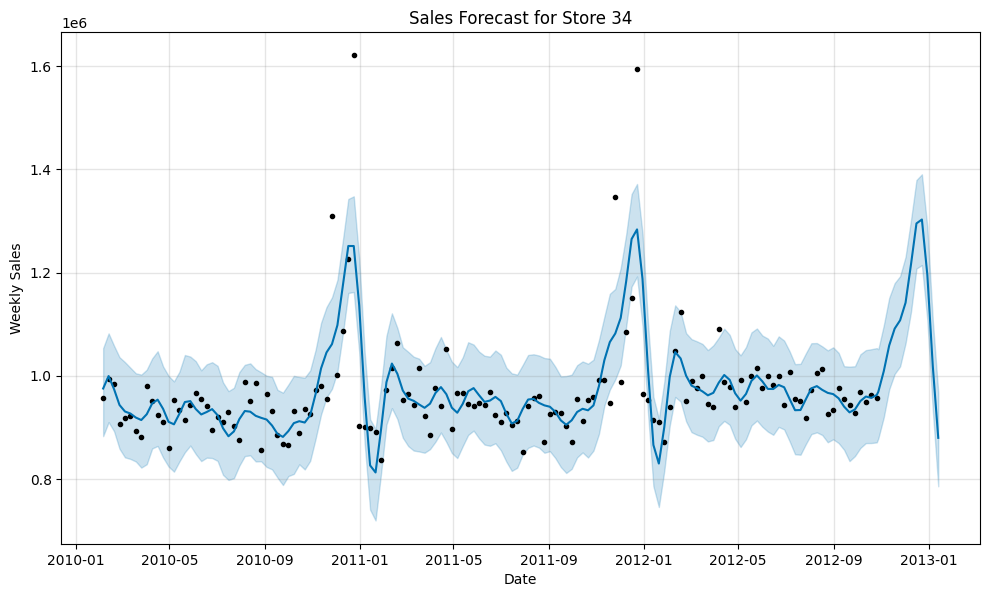

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/5xmtmmbi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/37ldiw4g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99332', 'data', 'file=/tmp/tmphvfwh82f/5xmtmmbi.json', 'init=/tmp/tmphvfwh82f/37ldiw4g.json', 'output', 'file=/tmp/tmphvfwh82f/prophet_modelh_4whwk4/prophet_model-20250308162306.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:23:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:23:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


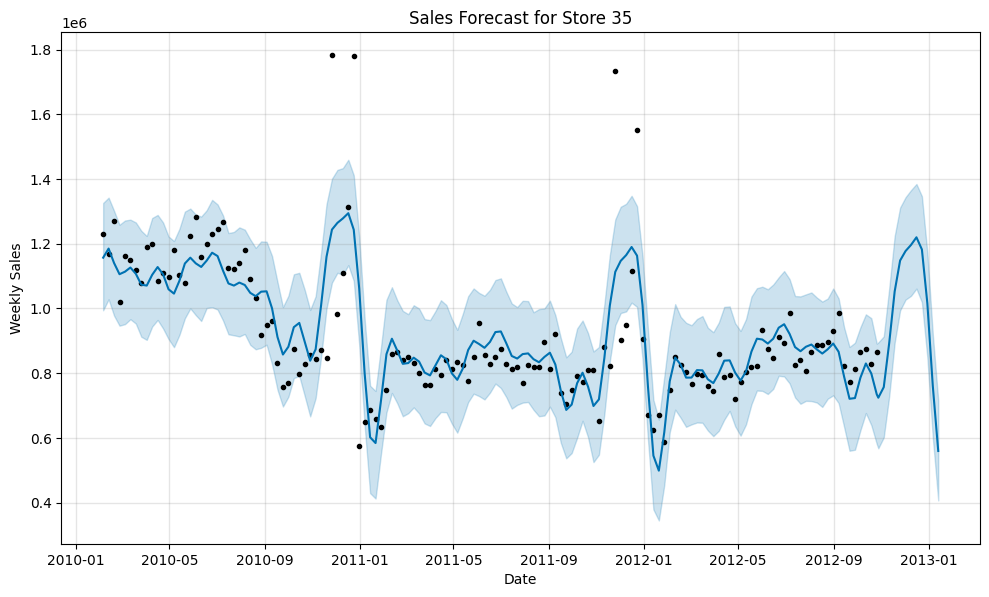

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/4zgr28fm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/_l20b4nh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98111', 'data', 'file=/tmp/tmphvfwh82f/4zgr28fm.json', 'init=/tmp/tmphvfwh82f/_l20b4nh.json', 'output', 'file=/tmp/tmphvfwh82f/prophet_modeli8v54s4y/prophet_model-20250308162306.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:23:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:23:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


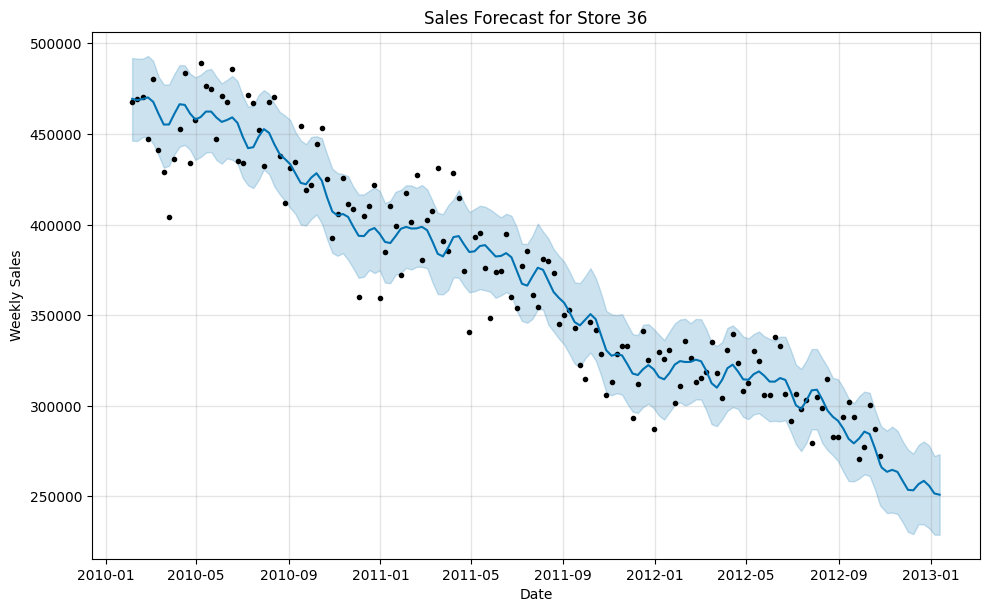

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/bbzl51ci.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/5_colob7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23991', 'data', 'file=/tmp/tmphvfwh82f/bbzl51ci.json', 'init=/tmp/tmphvfwh82f/5_colob7.json', 'output', 'file=/tmp/tmphvfwh82f/prophet_model5hoqsugk/prophet_model-20250308162307.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:23:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:23:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


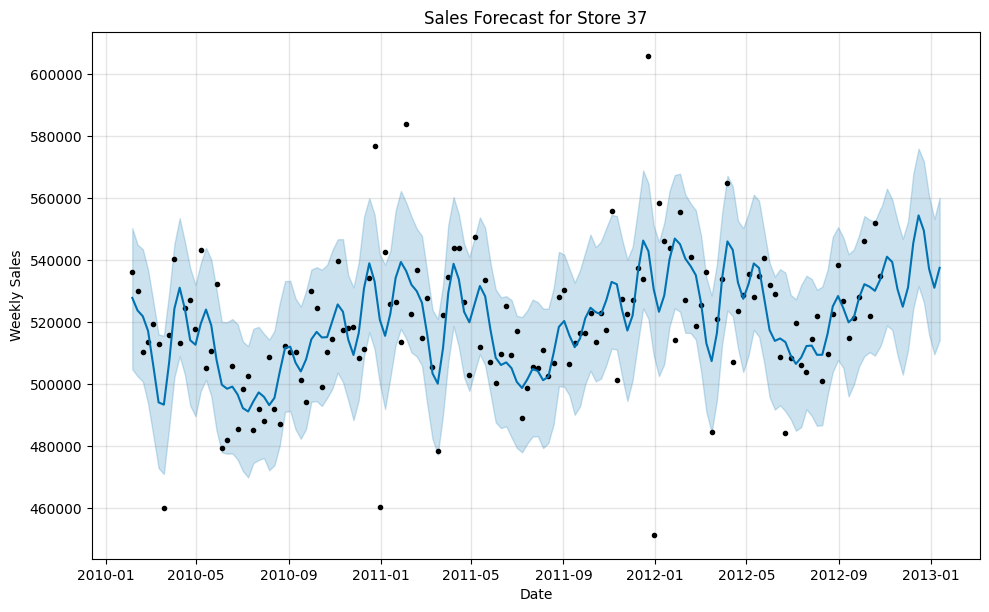

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/8ivq9gvn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/0wdb0rc2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97057', 'data', 'file=/tmp/tmphvfwh82f/8ivq9gvn.json', 'init=/tmp/tmphvfwh82f/0wdb0rc2.json', 'output', 'file=/tmp/tmphvfwh82f/prophet_modelxzryhnvo/prophet_model-20250308162308.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:23:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:23:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


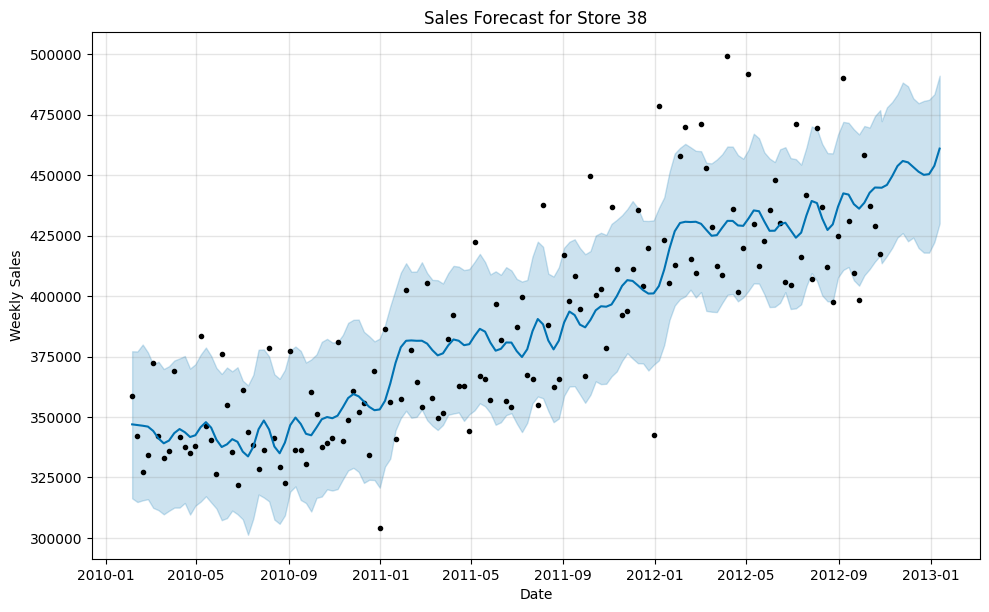

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/lltsvv7g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/ip2u2u8y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86948', 'data', 'file=/tmp/tmphvfwh82f/lltsvv7g.json', 'init=/tmp/tmphvfwh82f/ip2u2u8y.json', 'output', 'file=/tmp/tmphvfwh82f/prophet_modelt98xpz_l/prophet_model-20250308162308.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:23:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:23:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


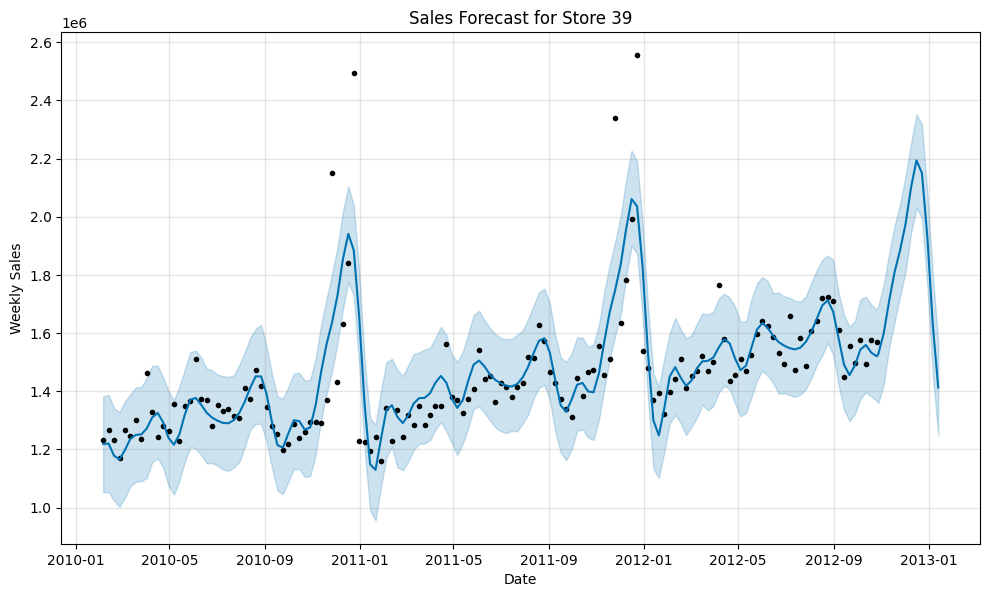

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/ivya1ghl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/3_cwib30.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48251', 'data', 'file=/tmp/tmphvfwh82f/ivya1ghl.json', 'init=/tmp/tmphvfwh82f/3_cwib30.json', 'output', 'file=/tmp/tmphvfwh82f/prophet_modelvgnphgxv/prophet_model-20250308162309.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:23:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:23:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


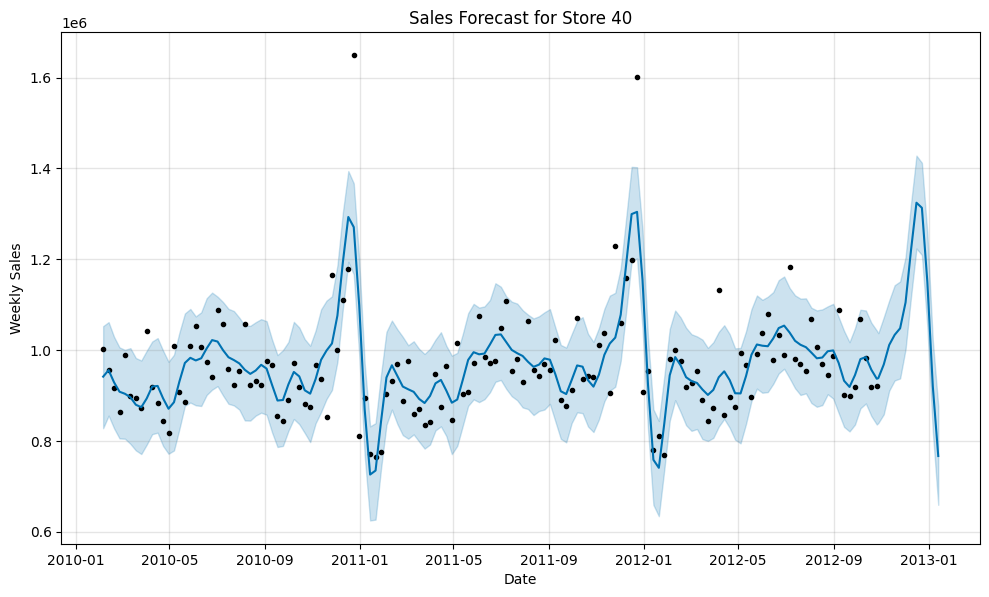

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/e99jtj79.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/6v4wrxno.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38606', 'data', 'file=/tmp/tmphvfwh82f/e99jtj79.json', 'init=/tmp/tmphvfwh82f/6v4wrxno.json', 'output', 'file=/tmp/tmphvfwh82f/prophet_modelnc39uziz/prophet_model-20250308162310.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:23:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:23:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


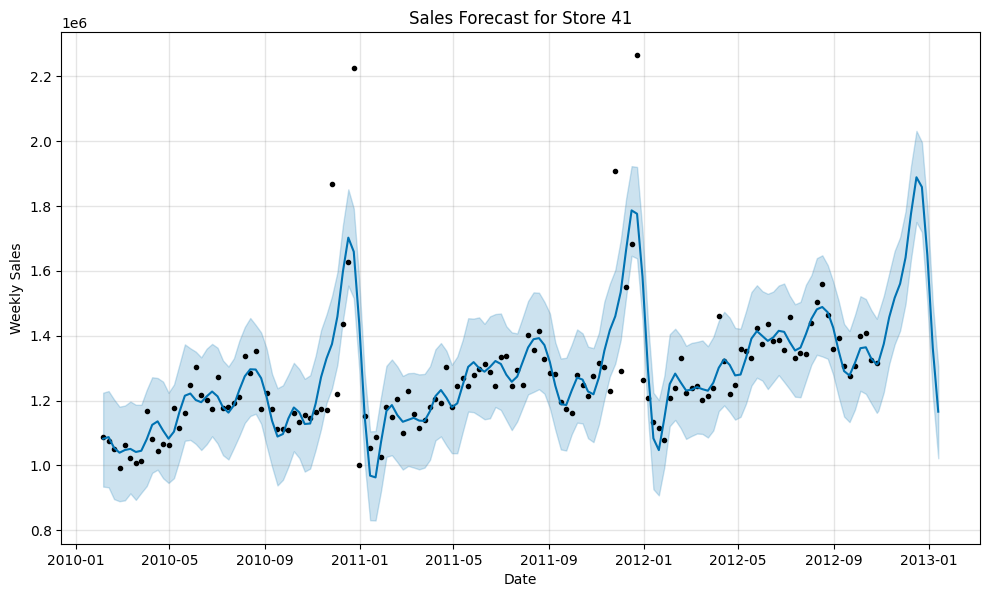

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/k09iu1cz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/7f0tyyav.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26347', 'data', 'file=/tmp/tmphvfwh82f/k09iu1cz.json', 'init=/tmp/tmphvfwh82f/7f0tyyav.json', 'output', 'file=/tmp/tmphvfwh82f/prophet_modelvrfnydl4/prophet_model-20250308162310.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:23:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:23:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


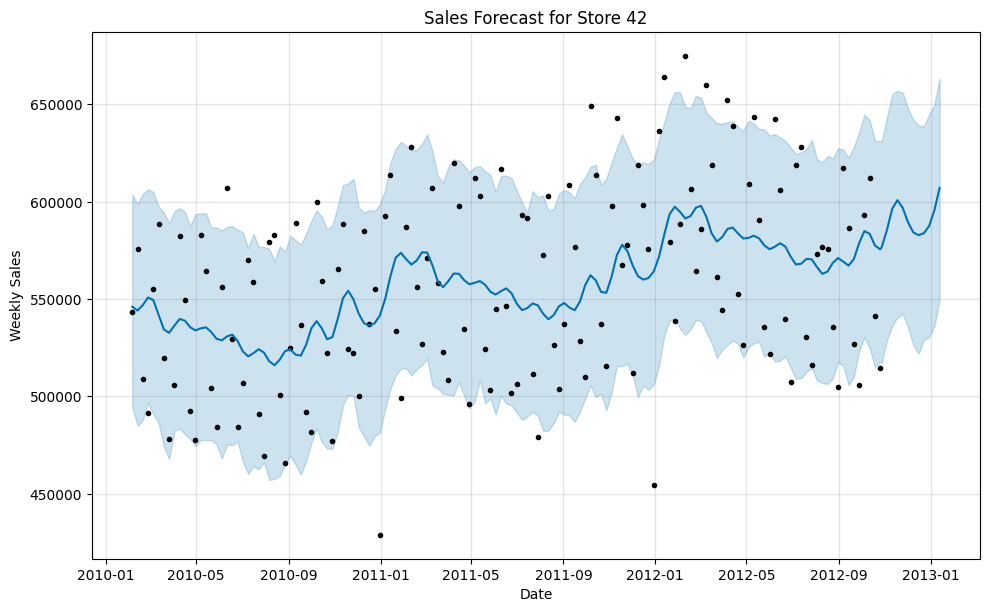

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/u6z61z6t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/0tc0d3dz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59406', 'data', 'file=/tmp/tmphvfwh82f/u6z61z6t.json', 'init=/tmp/tmphvfwh82f/0tc0d3dz.json', 'output', 'file=/tmp/tmphvfwh82f/prophet_modelabags7wc/prophet_model-20250308162311.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:23:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:23:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


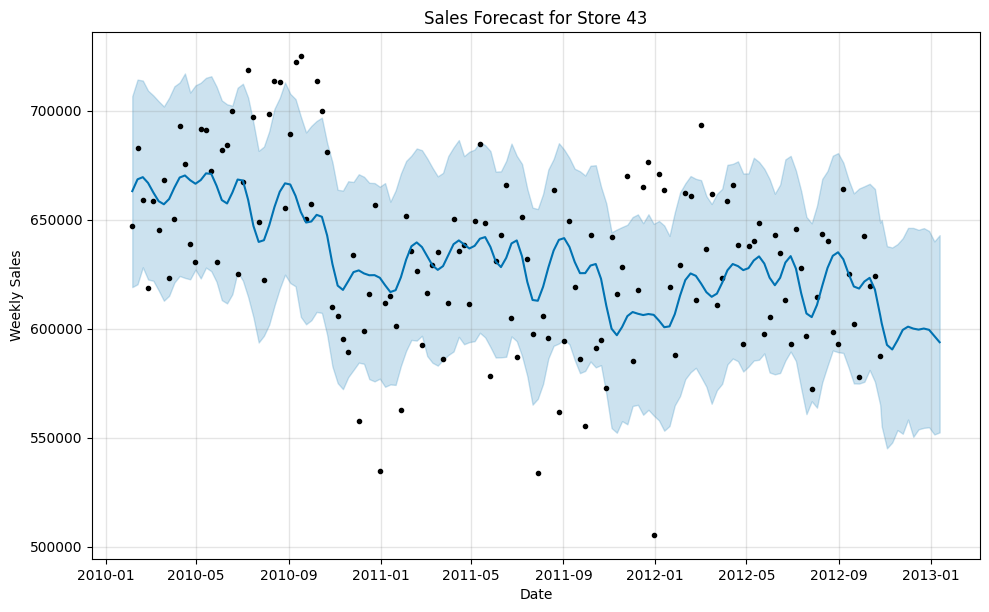

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/66b_inif.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/2yqaqt59.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94818', 'data', 'file=/tmp/tmphvfwh82f/66b_inif.json', 'init=/tmp/tmphvfwh82f/2yqaqt59.json', 'output', 'file=/tmp/tmphvfwh82f/prophet_model6jzq28a_/prophet_model-20250308162312.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:23:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:23:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


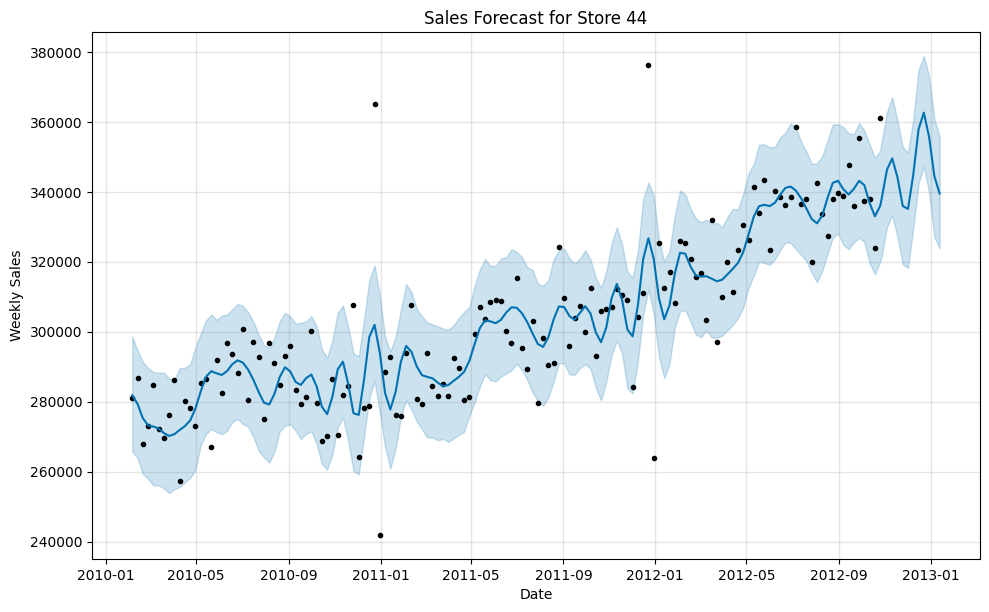

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/13hjrzlv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphvfwh82f/o7cd8pcm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22782', 'data', 'file=/tmp/tmphvfwh82f/13hjrzlv.json', 'init=/tmp/tmphvfwh82f/o7cd8pcm.json', 'output', 'file=/tmp/tmphvfwh82f/prophet_modelpy00z3ul/prophet_model-20250308162313.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:23:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:23:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


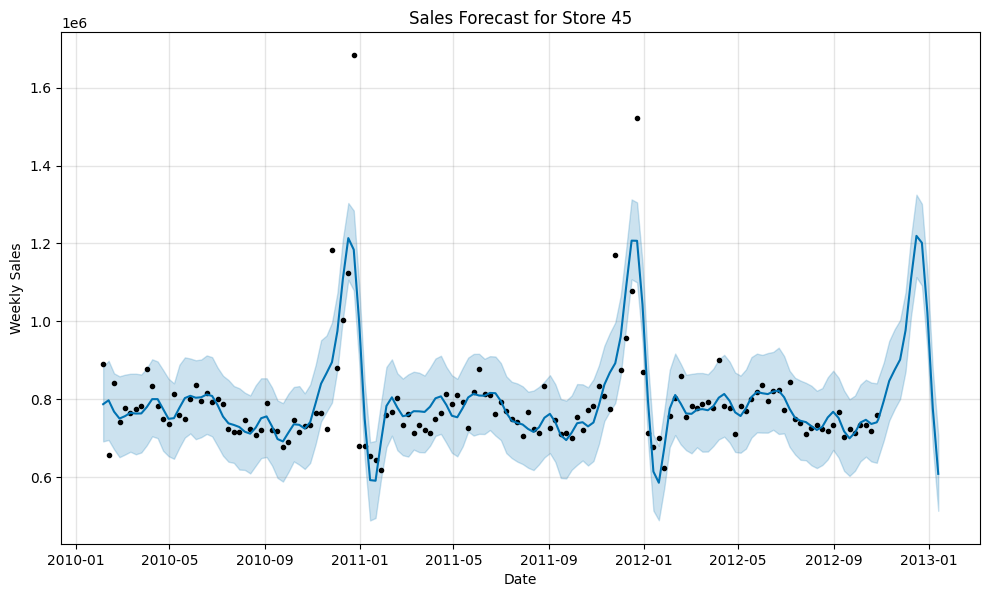

In [46]:
from prophet import Prophet
import matplotlib.pyplot as plt

# Dictionary to store forecasts for each store
store_forecasts = {}

# Loop through each store and fit a Prophet model
for store, data in store_data.items():
    # Prepare data for Prophet (requires columns 'ds' and 'y')
    prophet_data = data[['Date', 'Weekly_Sales']].rename(columns={'Date': 'ds', 'Weekly_Sales': 'y'})

    # Initialize and fit the Prophet model
    model = Prophet()
    model.fit(prophet_data)

    # Create a dataframe for future predictions (next 12 weeks)
    future = model.make_future_dataframe(periods=12, freq='W')

    # Make predictions
    forecast = model.predict(future)

    # Store the forecast
    store_forecasts[store] = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

    # Plot the forecast
    fig = model.plot(forecast)
    plt.title(f'Sales Forecast for Store {store}')
    plt.xlabel('Date')
    plt.ylabel('Weekly Sales')
    plt.show()

In [47]:
# Display forecast for Store 1
print(store_forecasts[1].tail(12))

            ds          yhat    yhat_lower    yhat_upper
143 2012-10-28  1.533722e+06  1.395470e+06  1.675669e+06
144 2012-11-04  1.599966e+06  1.448049e+06  1.723591e+06
145 2012-11-11  1.690154e+06  1.557422e+06  1.819761e+06
146 2012-11-18  1.747222e+06  1.617730e+06  1.891541e+06
147 2012-11-25  1.768336e+06  1.634869e+06  1.898715e+06
148 2012-12-02  1.810911e+06  1.670708e+06  1.956220e+06
149 2012-12-09  1.913994e+06  1.773113e+06  2.049439e+06
150 2012-12-16  2.024516e+06  1.888226e+06  2.159998e+06
151 2012-12-23  2.026088e+06  1.884306e+06  2.170255e+06
152 2012-12-30  1.856234e+06  1.726449e+06  1.990632e+06
153 2013-01-06  1.590309e+06  1.444919e+06  1.720609e+06
154 2013-01-13  1.394522e+06  1.249978e+06  1.534467e+06


In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Evaluate for a specific store (e.g., Store 1)
actual_sales = store_data[1]['Weekly_Sales']
predicted_sales = store_forecasts[1]['yhat'][:len(actual_sales)]

# Calculate MAE and RMSE
mae = mean_absolute_error(actual_sales, predicted_sales)
mse = mean_squared_error(actual_sales, predicted_sales)
rmse = np.sqrt(mse)  # Manually calculate RMSE

print(f"Store 1 - MAE: {mae:.2f}, RMSE: {rmse:.2f}")

Store 1 - MAE: 76151.72, RMSE: 106875.93


<ipython-input-50-efd3c3b417ef>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast['Store'] = store


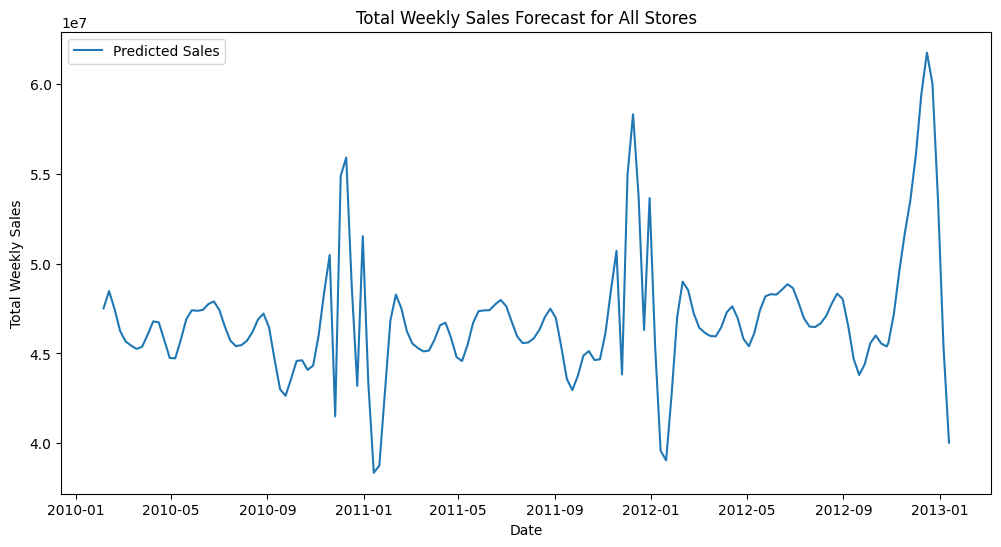

In [50]:
# Aggregate forecasts for all stores
total_forecast = pd.DataFrame()

for store, forecast in store_forecasts.items():
    forecast['Store'] = store
    total_forecast = pd.concat([total_forecast, forecast])

# Group by date and sum the predicted sales
total_forecast_aggregated = total_forecast.groupby('ds')['yhat'].sum().reset_index()

# Plot the total forecast
plt.figure(figsize=(12, 6))
plt.plot(total_forecast_aggregated['ds'], total_forecast_aggregated['yhat'], label='Predicted Sales')
plt.title('Total Weekly Sales Forecast for All Stores')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
plt.legend()
plt.show()

In [51]:
# Save forecasts to CSV
total_forecast.to_csv('store_sales_forecasts.csv', index=False)